In [1]:
#Importing libraries for preprocessing 
import pandas as pd
import numpy as np

In [2]:
#reading in csv file for cleaning 
file = pd.read_csv("Cars.comScraped.csv")
df = file

In [3]:
print(df.shape)

(10216, 21)


In [4]:
df.head(50)

,Title,Dealer,Location,State,Rating,Link,Exterior Color,Interior Color,Drivetrain,MPG,...,Transmission,Engine,VIN,Stock#,Mileage,Convenience Features,Entertainment Features,Exterior Features,Safety Features,Price
0,2025 Chevrolet Trax FWD ACTIV,Marianna Chevrolet GMC,NaN,FL,4.4,https://www.cars.com/vehicledetail/1454b905-f3...,Summit White,Jet Black With Artemis Accents,Front-wheel Drive,28–32\nBased on EPA mileage ratings. Use for c...,...,6-Speed Automatic,"ECOTEC 1.2L I-3 gasoline direct injection, DOH...",KL77LKEP1SC195483,MG95483,5 mi.,"Adaptive Cruise Control, Heated Seats, Heated ...","Bluetooth®, Premium Sound System, USB Port, Wi...",Alloy Wheels,"Automatic Emergency Braking, Backup Camera, Bl...","$26,665\n\n\n MSRP $27,320\n \n\n ..."
1,2025 Chevrolet Trax FWD 2RS,Marianna Chevrolet GMC,NaN,FL,4.4,https://www.cars.com/vehicledetail/9d7a6390-ef...,Mosaic Black Metallic,Jet Black w/Red Accents,Front-wheel Drive,28–32\nBased on EPA mileage ratings. Use for c...,...,6-Speed Automatic,"ECOTEC 1.2L I-3 gasoline direct injection, DOH...",KL77LJEP9SC192972,MG92972,4 mi.,"Adaptive Cruise Control, Heated Seats, Heated ...","Bluetooth®, Premium Sound System, USB Port, Wi...",Alloy Wheels,"Automatic Emergency Braking, Backup Camera, Bl...","$25,837\n\n\n MSRP $26,425"
2,2025 Honda HR-V 2WD Sport,Manly Honda,NaN,CA,4.7,https://www.cars.com/vehicledetail/4a3b7f3a-a6...,Platinum White Pearl,Black,Front-wheel Drive,26–32\nBased on EPA mileage ratings. Use for c...,...,Automatic,"2L I-4 gasoline direct injection, DOHC, i-VTEC...",3CZRZ1H57SM748242,108878,7 mi.,"Adaptive Cruise Control, Heated Seats, Keyless...","Android Auto®, Apple CarPlay®, Bluetooth®, USB...",Alloy Wheels,"Automatic Emergency Braking, Backup Camera, Bl...","$29,350\n\n\n MSRP $29,350"
3,2024 Chevrolet Equinox EV LT,Mac Haik Chevrolet,NaN,TX,4.8,https://www.cars.com/vehicledetail/1a37d58b-d9...,Sterling Gray Metallic,Black / Blue,Front-wheel Drive,NaN,...,1-Speed Automatic,Electric,3GN7DLRP9RS261631,245775,6 mi.,"Adaptive Cruise Control, Heated Steering Wheel...","Satellite Radio, USB Port",Alloy Wheels,"Automatic Emergency Braking, Backup Camera, Br...","$40,140"
4,2025 Cadillac XT6 Luxury FWD,Baker Buick GMC Cadillac,NaN,SC,0.0,https://www.cars.com/vehicledetail/354f7d1e-1d...,Stellar Black Metallic,Jet Black,Front-wheel Drive,21–27\nBased on EPA mileage ratings. Use for c...,...,Automatic,"2L I-4 gasoline direct injection, DOHC, variab...",1GYKPAR4XSZ130912,C3900,5 mi.,"Heated Seats, Keyless Entry, Keyless Start, Na...","Android Auto®, Apple CarPlay®, Bluetooth®, USB...","Alloy Wheels, Sunroof/Moonroof","Automatic Emergency Braking, Backup Camera, Bl...","$49,215\n\n\n MSRP $51,215"
5,2025 Chevrolet Trax FWD ACTIV,Vaughn Automotive,NaN,IA,4.5,https://www.cars.com/vehicledetail/4bb3db95-b3...,Nitro Yellow Metallic,Jet Black w/Artemis Accents,Front-wheel Drive,28–32\nBased on EPA mileage ratings. Use for c...,...,6-Speed Automatic,"ECOTEC 1.2L I-3 gasoline direct injection, DOH...",KL77LKEP0SC123755,123755,3 mi.,"Adaptive Cruise Control, Heated Seats, Heated ...","Bluetooth®, Premium Sound System, USB Port, Wi...","Alloy Wheels, Roof Rack","Automatic Emergency Braking, Backup Camera, Bl...","$25,604\n\n\n MSRP $26,585"
6,2025 Chevrolet Blazer EV eAWD LT,McGrath Chevrolet of Dubuque,NaN,IA,4.4,https://www.cars.com/vehicledetail/e686b394-83...,Summit White,Black,All-wheel Drive,NaN,...,Automatic,Electric Motor,3GNKDGRJ5SS192990,T250702,3 mi.,"Adaptive Cruise Control, Heated Seats, Heated ...","Bluetooth®, USB Port, WiFi Hotspot","Alloy Wheels, Roof Rack, Tow Hitch","Automatic Emergency Braking, Backup Camera, Bl...","$51,985\n\n\n MSRP $51,985"
7,2025 Mazda CX-90 PHEV Sport,Jim Click Mazda East Tucson,NaN,AZ,2.8,https://www.cars.com/vehicledetail/20a9d9ba-44...,Rhodium White Premium,Greige,All-wheel Drive,0–0\nBased on EPA mileage ratings. Use for com...,...,Automatic,E-SKYACTIV-G 2.5L I-4 gasoline direct injectio...,JM3KKCHA6S1218692,L250161,0 mi.,"Adaptive Cruise

# Preprocessing

## Dealing with duplicate values 
Firstly, duplicate values are going to be deleted due to the script having to be run on the same page multiple times. Though, this needs to be done with care as the same car title may appear multiple times buy may be from different dealers. 

In [5]:
duplicate_titles = df['Title'].value_counts()
duplicate_titles = duplicate_titles[duplicate_titles > 1]
print(duplicate_titles)


Title
2025 Kia K4 EX                                   82
2025 Honda CR-V Hybrid Sport-L                   60
2025 Kia K4 GT-Line                              54
2025 Kia K4 LXS                                  52
2025 Hyundai TUCSON Hybrid SEL Convenience       43
                                                 ..
2007 Nissan Xterra Off Road                       2
2024 RAM 3500 Tradesman Crew Cab 4x4 6'4' Box     2
2025 Volkswagen ID.4 Pro S Plus                   2
2012 Toyota Yaris LE                              2
2025 Jeep Wagoneer L Series I 4x4                 2
Name: count, Length: 1755, dtype: int64


In [6]:
def remove_duplicates(df):
    def deduplicate(group):
        if group['VIN'].notna().any():  #If at least one VIN is not null
            return group.drop_duplicates(subset=['VIN'])
        elif group['Stock#'].notna().any():  #If at least one Stock Number is not null
            return group.drop_duplicates(subset=['Stock#'])
        elif group['Mileage'].notna().any():  #If at least one Mileage is not null
            return group.drop_duplicates(subset=['Mileage'])
        else:  #If VIN, Stock Number, and Mileage are all null, use Dealership and Price
            return group.drop_duplicates(subset=['Dealer', 'Price'])
    
    return df.groupby('Title', group_keys=False).apply(deduplicate).reset_index(drop=True)

In [7]:
df = remove_duplicates(df)

C:\Users\Elija\AppData\Local\Temp\ipykernel_4464\640937183.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Title', group_keys=False).apply(deduplicate).reset_index(drop=True)


In [8]:
print(df.shape)#Number of columns drop from 10216 to 9204

(9204, 21)


## Dropping columns 
VIN, Stock#, and Link are being dropped due to having no visualization or predictive value. Location will be dropped due to having nothing but NULL values. 

In [9]:
df = df.drop(columns=['VIN', 'Stock#', 'Location', 'Link'], errors='ignore')
df.columns

Index(['Title', 'Dealer', 'State', 'Rating', 'Exterior Color',
       'Interior Color', 'Drivetrain', 'MPG', 'Fuel Type', 'Transmission',
       'Engine', 'Mileage', 'Convenience Features', 'Entertainment Features',
       'Exterior Features', 'Safety Features', 'Price'],
      dtype='object')

# Splitting Title column into Year and Make features for further predictive potential. 

In [10]:
def extract_value_from_column(df, column, regex_pattern=None, split_index=None, new_column_name=None):
    #Extracts a value from a specified column using either regex or string splitting.

    if regex_pattern:
        #Extract using regex 
        df[new_column_name] = df[column].str.extract(regex_pattern)
    elif split_index is not None:
        #Extract using string split 
        df[new_column_name] = df[column].str.split().str[split_index]
    
    return df


In [11]:
def extract_year_from_title(df):
    #Extract Year
    return extract_value_from_column(df, 'Title', regex_pattern=r'(\b\d{4}\b)', new_column_name='Year')

def extract_make_from_title(df):
    #Extract Make 
    return extract_value_from_column(df, 'Title', split_index=1, new_column_name='Make')


In [12]:
df = extract_year_from_title(df)  #Creates Year column
df = extract_make_from_title(df)  #Creates Make column

In [13]:
df.columns

Index(['Title', 'Dealer', 'State', 'Rating', 'Exterior Color',
       'Interior Color', 'Drivetrain', 'MPG', 'Fuel Type', 'Transmission',
       'Engine', 'Mileage', 'Convenience Features', 'Entertainment Features',
       'Exterior Features', 'Safety Features', 'Price', 'Year', 'Make'],
      dtype='object')

In [14]:
def count_nulls(df, columns):
    #Counts the number of missing values in the specified columns of a DataFrame.
    for col in columns:
        print(f"Number of null values in '{col}': {df[col].isnull().sum()}")


count_nulls(df, ['Year', 'Make'])

Number of null values in 'Year': 0
Number of null values in 'Make': 0


# Preprocessing States 

In [15]:
unique_states = df['State'].unique()
print(f"The unique states are: {unique_states}")
print(f"The number of unique states are {len(unique_states)}")

The unique states are: ['IL' 'FL' 'CO' 'CA' 'OK' 'NY' 'WI' 'MI' 'MN' 'NE' 'IN' 'WA' 'IA' 'GA'
 'PA' 'OH' 'KS' 'NJ' 'TX' 'MD' 'MO' 'NC' 'KY' 'NH' 'OR' nan 'MA' 'TN' 'VA'
 'NV' 'AZ' 'HI' 'ID' 'SC' 'NM' 'AL' 'AR' 'WY' 'UT' 'CT' 'DE' 'MT' 'SD'
 'MS' 'ND' 'LA' 'VT' 'RI' 'ME' 'WV' 'AK']
The number of unique states are 51


Vehicles have 50 unique states, with some entries having null values.

In [16]:
number_null_states = df['State'].isnull().sum()
print(f"The number of null states is: {number_null_states}")

The number of null states is: 140


In [17]:
def impute_missing_state(df):
    #Iterate over each dealer 
    for dealer, group in df.groupby('Dealer'):
        #Get rows where state is missing
        missing_state_rows = group[group['State'].isnull()]
        
        if not missing_state_rows.empty:
            #Get the most frequent state for the dealer
            known_states = group[group['State'].notnull()]['State']
            
            if not known_states.empty:
                #Get the most common state for this dealer
                most_common_state = known_states.mode()[0]
                
                #Fill missing states with the most common state for the dealer
                df.loc[(df['Dealer'] == dealer) & (df['State'].isnull()), 'State'] = most_common_state
    
    #Replace any remaining missing States witH UN (Unknown)
    df['State'].fillna('UN', inplace=True)
    
    return df




In [18]:
#Apply the function to your dataframe
df = impute_missing_state(df)

C:\Users\Elija\AppData\Local\Temp\ipykernel_4464\3487944069.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State'].fillna('UN', inplace=True)


In [19]:
number_null_states_after_imputation = df['State'].isnull().sum()
print(f"The number of null states is: {number_null_states_after_imputation}")

The number of null states is: 0


In [20]:
df = pd.get_dummies(df, columns=['State'], dtype=int) #One hot encode State



# Rating

In [21]:
from matplotlib import pyplot as plt

In [22]:
#Checking number of null ratings
num_null_ratings = df['Rating'].isnull().sum()
print(f"Num null ratings: {num_null_ratings}")

Num null ratings: 343


In [23]:
print(f"Data type of rating: {df.Rating.dtype}") #Checking data type of rating 

Data type of rating: float64


## Determinng if there is a correlation between Rating and Year, and Rating and Make

Correlation coefficient between Year and Rating: 0.024


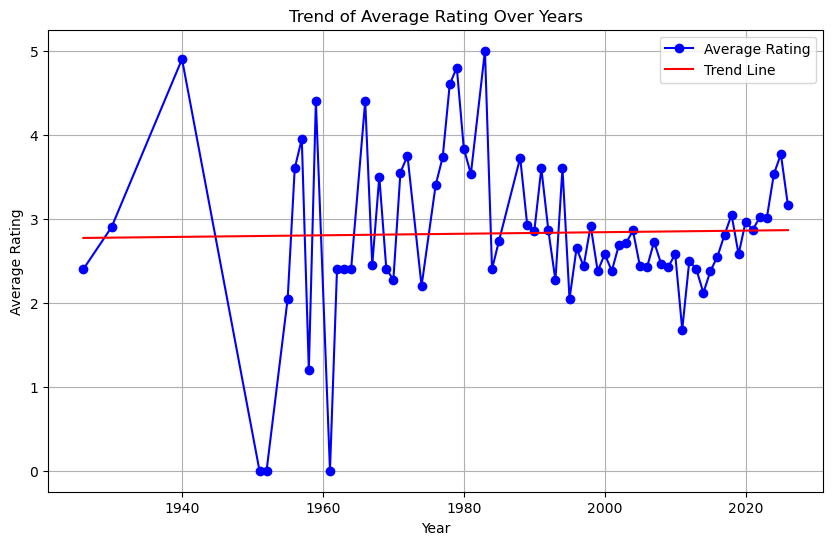

In [24]:
#Determining if there is a correlation between Rating and Year 
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df_avg = df.groupby('Year', as_index=False)['Rating'].mean()

#Remove NaN and infinite values
df_avg_cleaned = df_avg.dropna().replace([np.inf, -np.inf], np.nan).dropna()

#Fit a linear regression model
x = df_avg_cleaned['Year']
y = df_avg_cleaned['Rating']

if len(x) > 1: 
    m, b = np.polyfit(x, y, 1) 

    #Compute correlation coefficient between Year and Rating
    correlation = np.corrcoef(x, y)[0, 1]
    print(f"Correlation coefficient between Year and Rating: {correlation:.3f}")

    #Visualize trend
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'bo-', label='Average Rating')  
    plt.plot(x, m*x + b, 'r-', label='Trend Line')  
    plt.title('Trend of Average Rating Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Not enough valid data points")

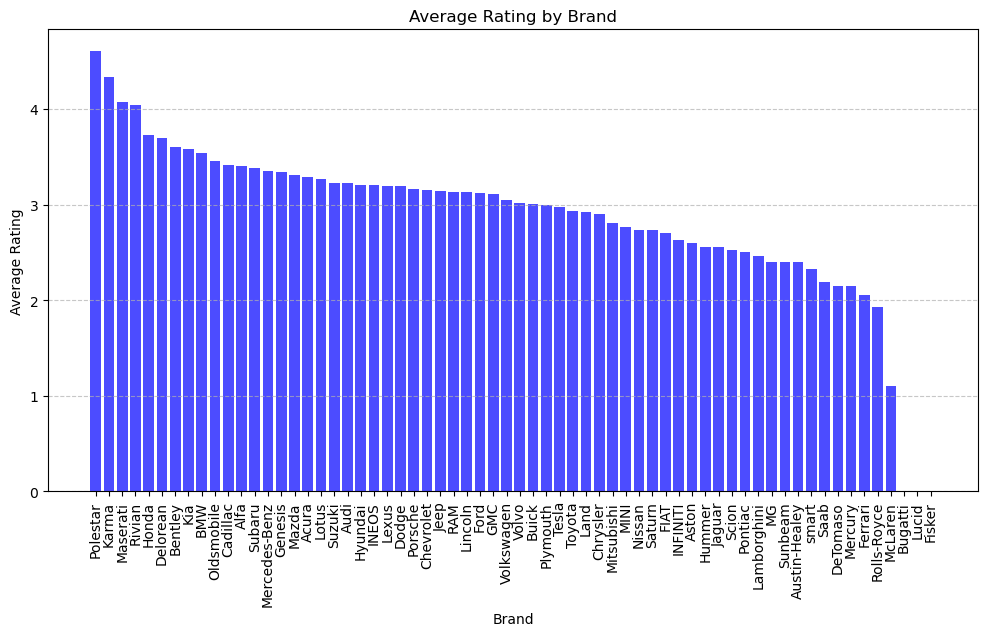

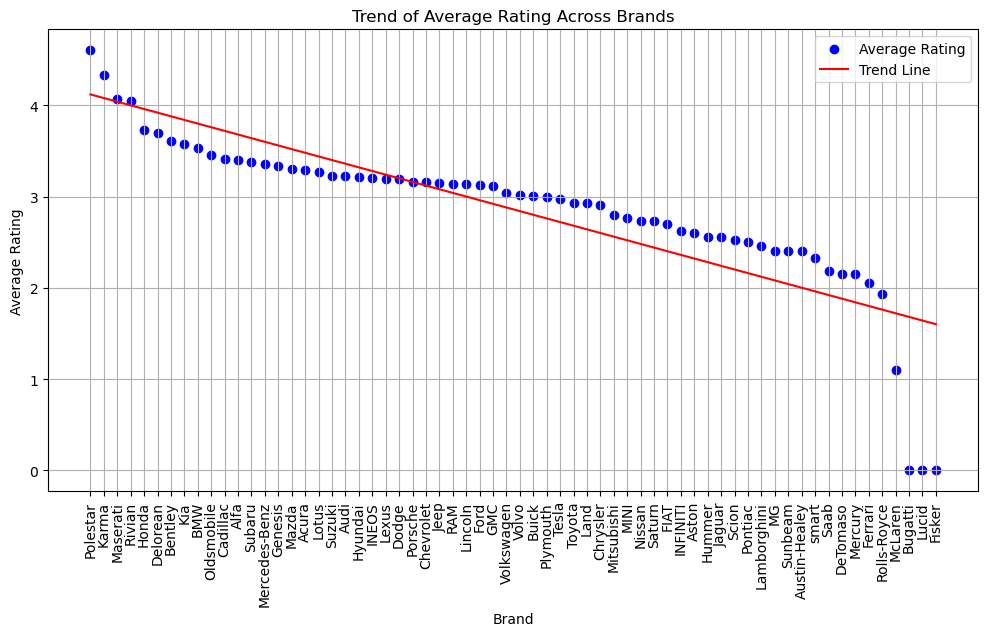

Correlation coefficient between Make and Rating: 0.020


In [25]:
from sklearn.preprocessing import LabelEncoder

#Group by Make and compute the mean rating
df_avg_brand = df.groupby('Make', as_index=False)['Rating'].mean()

#Remove NaN and infinite values
df_avg_brand = df_avg_brand.replace([np.inf, -np.inf], np.nan).dropna()

#Sort by rating
df_avg_brand = df_avg_brand.sort_values(by='Rating', ascending=False)

#Visualze rating per brand
plt.figure(figsize=(12, 6))
plt.bar(df_avg_brand['Make'], df_avg_brand['Rating'], color='b', alpha=0.7)
plt.xticks(rotation=90)  
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Linear Trend Analysis 
if len(df_avg_brand) > 1:
    x = np.arange(len(df_avg_brand)) 
    y = df_avg_brand['Rating']

    
    if len(set(x)) > 1 and len(set(y)) > 1:
        #Fit a linear regression model
        m, b = np.polyfit(x, y, 1)

        #Visualize trend
        plt.figure(figsize=(12, 6))
        plt.scatter(x, y, label='Average Rating', color='b')
        plt.plot(x, m*x + b, 'r-', label='Trend Line')  # Trend line
        plt.xticks(ticks=x, labels=df_avg_brand['Make'], rotation=90)
        plt.title('Trend of Average Rating Across Brands')
        plt.xlabel('Brand')
        plt.ylabel('Average Rating')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Not enough variation in data for trend line.")
else:
    print("Not enough brands to perform trend analysis.")

#Label encoding for correlation analysis
label_encoder = LabelEncoder()
df_avg_brand['Make_encoded'] = label_encoder.fit_transform(df_avg_brand['Make'])

#Compute correlation coefficient between Make and Rating
correlation = np.corrcoef(df_avg_brand['Make_encoded'], df_avg_brand['Rating'])[0, 1]

print(f"Correlation coefficient between Make and Rating: {correlation:.3f}")


Since there is minimal relationship between both Rating and Make, and Rating and Year, we will go with either mean or median imputation instead. 

In [26]:
import seaborn as sns

def plot_histogram(df, column_name, bins=30, color='blue', kde=True, figsize=(10, 6), title=None, xlabel=None, ylabel=None):
    
    #Plots a customizable histogram for a specified column in the dataframe.

    #Create the plot
    plt.figure(figsize=figsize)
    
    #Plot histogram
    sns.histplot(df[column_name], bins=bins, kde=kde, color=color)
    
    #Title and x axis labels
    if title:
        plt.title(title)
    else:
        plt.title(f'Distribution of {column_name}')
    
    if xlabel:
        plt.xlabel(xlabel)
    else:
        plt.xlabel(column_name)
    
    if ylabel:
        plt.ylabel(ylabel)
    else:
        plt.ylabel('Frequency')
    
    #Show grid for improved readability
    plt.grid(True)
    
    #Display the plot
    plt.show()

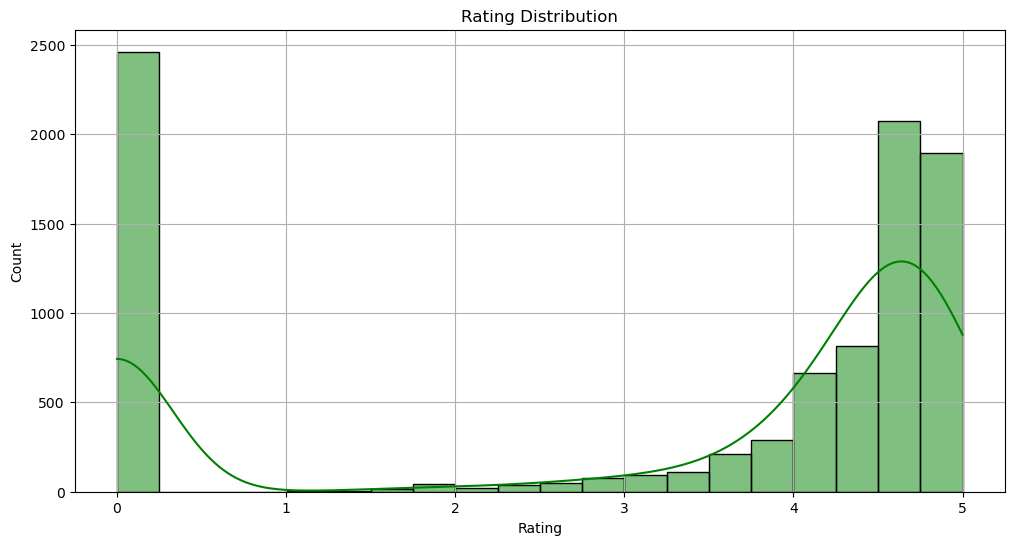

In [27]:
plot_histogram(df, 'Rating', bins=20, color='green', kde=True, figsize=(12, 6), title='Rating Distribution', xlabel='Rating', ylabel='Count')

In [28]:
#Count the number of zeros in Rating column
zero_count = (df['Rating'] == 0).sum()

print(f"Number of zeros in the Rating column: {zero_count}")


Number of zeros in the Rating column: 2462


Due to outliers and skewness of the data, NaN values will be replaced with the median. It is also assumed that ratings with 0 are those that are unrated, and not that the vehicle is poorly rated. Therefore they will also be replaced with the median. 

In [29]:
median_rating = df['Rating'][df['Rating'] != 0].median()

#Replace zeros and NaN with the median
df['Rating'] = df['Rating'].replace(0, median_rating)
df['Rating'] = df['Rating'].fillna(median_rating)

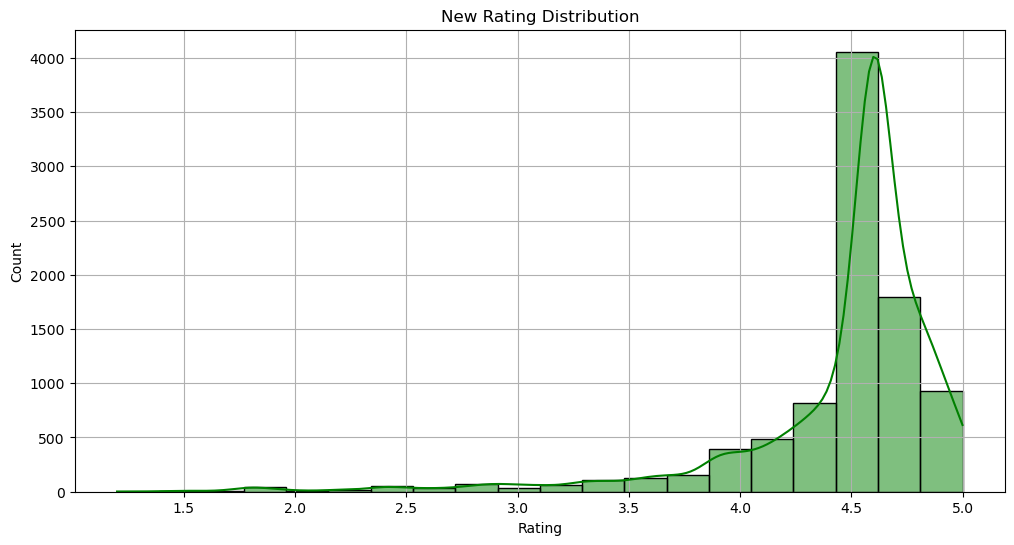

In [30]:
plot_histogram(df, 'Rating', bins=20, color='green', kde=True, figsize=(12, 6), title='New Rating Distribution', xlabel='Rating', ylabel='Count')

# Drivetrain 

In [31]:
df['Drivetrain'].unique() #Get unique values for Drivetrain

array(['–', 'Rear-wheel Drive', 'Unknown', 'Four-wheel Drive',
       'Front-wheel Drive', 'All-wheel Drive', nan, 'AWD', 'FWD',
       'All Wheel Drive', '4WD'], dtype=object)

In [32]:
def clean_and_encode_drivetrain(df):
    #Combine values that mean the same thing 
    drivetrain_mapping = {
        'Rear-wheel Drive': 'RWD',
        'Four-wheel Drive': '4WD',
        'Front-wheel Drive': 'FWD',
        'All-wheel Drive': 'AWD',
        'AWD': 'AWD',
        'FWD': 'FWD',
        'All Wheel Drive': 'AWD',
        '4WD': '4WD',
        'Unknown': 'Unknown',  #Assuming Unknown is a valid entry 
        '–': 'Unknown'  #Assuming dash represents missing or unknown values
    }
    
    df['Drivetrain'] = df['Drivetrain'].replace(drivetrain_mapping)
    
 
    df['Drivetrain'] = df['Drivetrain'].fillna('Unknown')  #Replace NaN with 'Unknown'
    
    #Apply One-Hot Encoding
    df_encoded = pd.get_dummies(df, columns=['Drivetrain'], prefix=['Drivetrain'], drop_first=False)
    df_encoded = df_encoded.apply(lambda x: x.astype(int) if x.name.startswith('Drivetrain') else x)
    
    return df_encoded




In [33]:
df = clean_and_encode_drivetrain(df)

In [34]:
df

,Title,Dealer,Rating,Exterior Color,Interior Color,MPG,Fuel Type,Transmission,Engine,Mileage,...,State_VT,State_WA,State_WI,State_WV,State_WY,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Drivetrain_Unknown
0,1926 Chrysler F-58,Gateway Classic Cars,2.4,Red,White,0–0\nBased on EPA mileage ratings. Use for com...,–,3-Speed Manual,4 Cylinder,"28,300 mi.",...,0,0,0,0,0,0,0,0,0,1
1,1930 Ford Model A Base,Skyway Classics,2.9,Magenta,Tan,0–0\nBased on EPA mileage ratings. Use for com...,Gasoline,automatic,350 V8,"17,089 mi.",...,0,0,0,0,0,0,0,0,0,1
2,1940 Ford Pickup Truck Base,Greenwood Automotive,4.9,–,–,0–0\nBased on EPA mileage ratings. Use for com...,–,Manual,–,"150,140 mi.",...,0,0,0,0,0,0,0,0,0,1
3,1951 Chevrolet Fleetline Deluxe,California Cars,4.6,Atomic Orange Metallic,Gray,0–0\nBased on EPA mileage ratings. Use for com...,Gasoline,Automatic,283 V8,437 mi.,...,0,0,0,0,0,0,0,0,1,0
4,1952 GMC Suburban,Exotic Motorsports of Oklahoma,4.6,Black,Tan,0–0\nBased on EPA mileage ratings. Use for com...,–,Automatic 700R4,5.7L V8,570 mi.,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9199,2026 Land Rover Range Rover Velar P250 SE R-Dy...,"Napleton's Autowerks, Inc",4.6,Santorini Black Metallic,Cloud/Ebony,22–26\nBased on EPA mileage ratings. Use for c...,Gasoline,Automatic,"Ingenium 2L I-4 gasoline direct injection, DOH...",8 mi.,...,0,0,0,0,0,1,0,0,0,0
9200,2026 Land Rover Range Rover Velar P250 SE R-Dy...,"Jaguar, Land Rover of Wichita",4.6,Gray,Cloud,22–26\nBased on EPA mileage ratings. Use for c...,Gasoline,Automatic,"Ingenium 2L I-4 gasoline direct injection, DOH...",5 mi.,...,0,0,0,0,0,1,0,0,0,0
9201,2026 Land Rover Range Rover Velar P250 SE R-Dy...,"Jaguar, Land Rover of Wichita",4.6,Gray,Ebony,22–26\nBased on EPA mileage ratings. Use for c...,Gasoline,Automatic,"Ingenium 2L I-4 gasoline direct injection, DOH...",10 mi.,...,0,0,0,0,0,1,0,0,0,0
9202,2026 Land Rover Range Rover Velar P250 SE R-Dy...,"Jaguar, Land Rover of Wichita",4.6,Fuji White,Ebony,22–26\nBased on EPA mileage ratings. Use for c...,Gasoline,Automatic,"Ingenium 2L I-4 gasoline direct injection, DOH...",5 mi.,...,0,0,0,0,0,1,0,0,0,0


# MPG

In [35]:
import re

MPG is in the form lower_range-upper_range with text on the right side of it. We will use regex to extract it. 

In [36]:
#Function to extract the average mileage from text
def extract_average_mileage(text):
    match = re.search(r'(\d+)\s*–\s*(\d+)', str(text))
    if match:
        num1, num2 = map(int, match.groups())
        return (num1 + num2) / 2
    return None  

df['MPG'] = df['MPG'].apply(extract_average_mileage)

In [37]:
print(df['MPG'].max())

109.5


In [38]:
print((df['MPG'] == 0).sum())


806


In [39]:
print(df['Year'].describe())

count    9204.000000
mean     2019.928292
std         7.447835
min      1926.000000
25%      2017.000000
50%      2023.000000
75%      2025.000000
max      2026.000000
Name: Year, dtype: float64


Since MPG has generally improved throughout the years, imputation will be done based on year. No car should have a MPG of zero, so zero values will be imputated along with null values. 

In [40]:
def impute_mpg_based_on_year(df):
    #Function to apply imputation based on the year of the car
    def impute_mpg(row):
        if pd.isna(row['MPG']) or row['MPG'] == 0: #if NULL or 0
            if row['Year'] < 1966:
                return 15  #Estimated MPG for pre-1966 cars
            elif 1966 <= row['Year'] <= 1973:
                return 15  #MPG for 1966-1973 cars
            elif 1974 <= row['Year'] <= 1991:
                return 20  #MPG for 1974-1991 cars
            elif 1992 <= row['Year'] <= 2004:
                return 23  #MPG for 1992-2004 cars
            elif 2005 <= row['Year'] <= 2008:
                return 28  #MPG for 2005-2008 cars
            elif 2009 <= row['Year'] <= 2017:
                return 40  #MPG for 2009-2017 cars
            elif 2018 <= row['Year'] <= 2026:
                return 55  #Estimated MPG for 2018-2026 cars
        return row['MPG']  


    df['MPG'] = df.apply(impute_mpg, axis=1)
    return df



In [41]:
df = impute_mpg_based_on_year(df)

In [42]:
print((df['MPG'] == 0).sum())


0


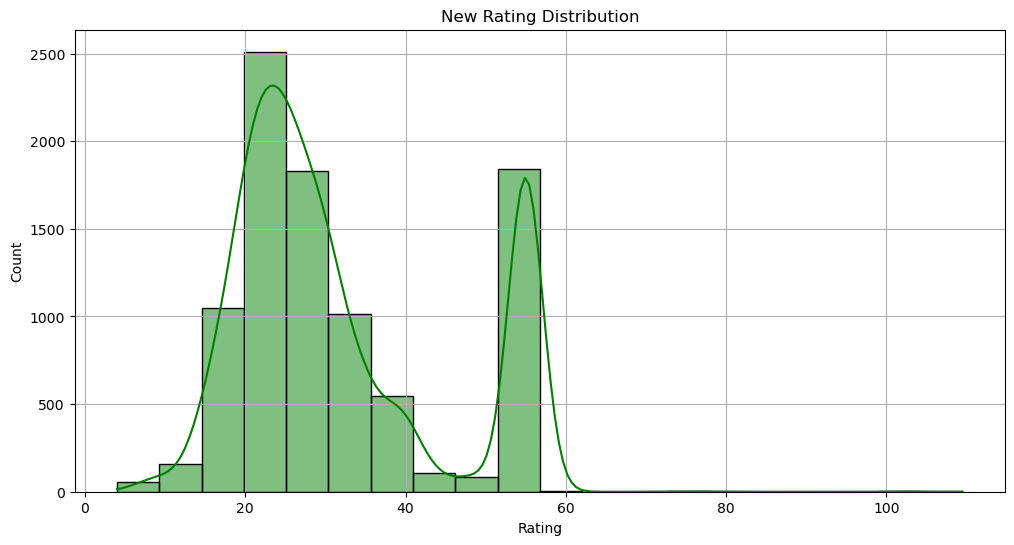

In [43]:
plot_histogram(df, 'MPG', bins=20, color='green', kde=True, figsize=(12, 6), title='New Rating Distribution', xlabel='Rating', ylabel='Count')

In [44]:
df.columns

Index(['Title', 'Dealer', 'Rating', 'Exterior Color', 'Interior Color', 'MPG',
       'Fuel Type', 'Transmission', 'Engine', 'Mileage',
       'Convenience Features', 'Entertainment Features', 'Exterior Features',
       'Safety Features', 'Price', 'Year', 'Make', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UN',
       'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV',
       'State_WY', 'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD',
      

# Fuel Type

In [45]:
df['Fuel Type'].unique()

array(['–', 'Gasoline', 'Unspecified', 'Diesel', nan, 'E85 Flex Fuel',
       'Hybrid', 'Gaseous', 'Plug-In Hybrid', 'Gas Hybrid',
       'PHEV (plug-in hybrid electric vehicle)', 'All-Electric'],
      dtype=object)

In [46]:
def clean_and_encode_fuel_type(df):
    #Combine values that mean the same thing 
    fuel_type_mapping = {
        '–': 'Unknown',
        'Unspecified': 'Unknown',
        'Gas Hybrid': 'Hybrid',
        'PHEV (plug-in hybrid electric vehicle)': 'Plug-In Hybrid',
        'E85 Flex Fuel': 'Flex Fuel',
        'Gasoline': 'Gasoline',
        'Diesel': 'Diesel',
        'Gaseous': 'Gaseous',
        'Hybrid': 'Hybrid',
        'Plug-In Hybrid': 'Plug-In Hybrid',
        'All-Electric': 'All-Electric'
    }
    
    #Apply mapping and replace Nan with Unknown
    df['Fuel Type'] = df['Fuel Type'].map(fuel_type_mapping).fillna('Unknown')
    
    #Perform one-hot encoding
    df = pd.get_dummies(df, columns=['Fuel Type'], drop_first=True)
    
    return df



In [47]:
df = clean_and_encode_fuel_type(df)

In [48]:
df = df.apply(lambda x: x.astype(int) if x.name.startswith('Fuel Type') else x)


In [49]:
print(df.columns.tolist())


['Title', 'Dealer', 'Rating', 'Exterior Color', 'Interior Color', 'MPG', 'Transmission', 'Engine', 'Mileage', 'Convenience Features', 'Entertainment Features', 'Exterior Features', 'Safety Features', 'Price', 'Year', 'Make', 'State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UN', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY', 'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD', 'Drivetrain_Unknown', 'Fuel Type_Diesel', 'Fuel Type_Flex Fuel', 'Fuel Type_Gaseous', 'Fuel

In [50]:
df

,Title,Dealer,Rating,Exterior Color,Interior Color,MPG,Transmission,Engine,Mileage,Convenience Features,...,Drivetrain_FWD,Drivetrain_RWD,Drivetrain_Unknown,Fuel Type_Diesel,Fuel Type_Flex Fuel,Fuel Type_Gaseous,Fuel Type_Gasoline,Fuel Type_Hybrid,Fuel Type_Plug-In Hybrid,Fuel Type_Unknown
0,1926 Chrysler F-58,Gateway Classic Cars,2.4,Red,White,15.0,3-Speed Manual,4 Cylinder,"28,300 mi.",NaN,...,0,0,1,0,0,0,0,0,0,1
1,1930 Ford Model A Base,Skyway Classics,2.9,Magenta,Tan,15.0,automatic,350 V8,"17,089 mi.",NaN,...,0,0,1,0,0,0,1,0,0,0
2,1940 Ford Pickup Truck Base,Greenwood Automotive,4.9,–,–,15.0,Manual,–,"150,140 mi.",NaN,...,0,0,1,0,0,0,0,0,0,1
3,1951 Chevrolet Fleetline Deluxe,California Cars,4.6,Atomic Orange Metallic,Gray,15.0,Automatic,283 V8,437 mi.,NaN,...,0,1,0,0,0,0,1,0,0,0
4,1952 GMC Suburban,Exotic Motorsports of Oklahoma,4.6,Black,Tan,15.0,Automatic 700R4,5.7L V8,570 mi.,NaN,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9199,2026 Land Rover Range Rover Velar P250 SE R-Dy...,"Napleton's Autowerks, Inc",4.6,Santorini Black Metallic,Cloud/Ebony,24.0,Automatic,"Ingenium 2L I-4 gasoline direct injection, DOH...",8 mi.,"Adaptive Cruise Control, Heated Seats, Heated ...",...,0,0,0,0,0,0,1,0,0,0
9200,2026 Land Rover Range Rover Velar P250 SE R-Dy...,"Jaguar, Land Rover of Wichita",4.6,Gray,Cloud,24.0,Automatic,"Ingenium 2L I-4 gasoline direct injection, DOH...",5 mi.,"Adaptive Cruise Control, Heated Seats, Heated ...",...,0,0,0,0,0,0,1,0,0,0
9201,2026 Land Rover Range Rover Velar P250 SE R-Dy...,"Jaguar, Land Rover of Wichita",4.6,Gray,Ebony,24.0,Automatic,"Ingenium 2L I-4 gasoline direct injection, DOH...",10 mi.,"Adaptive Cruise Control, Heated Seats, Heated ...",...,0,0,0,0,0,0,1,0,0,0
9202,2026 Land Rover Range Rover Velar P250 SE R-Dy...,"Jaguar, Land Rover of Wichita",4.6,Fuji White,Ebony,24.0,Automatic,"Ingenium 2L I-4 gasoline direct injection, DOH...",5 mi.,"Adaptive Cruise Control, Heated Seats, Heated ...",...,0,0,0,0,0,0,1,0,0,0


In [51]:
df.columns

Index(['Title', 'Dealer', 'Rating', 'Exterior Color', 'Interior Color', 'MPG',
       'Transmission', 'Engine', 'Mileage', 'Convenience Features',
       'Entertainment Features', 'Exterior Features', 'Safety Features',
       'Price', 'Year', 'Make', 'State_AK', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DE', 'State_FL', 'State_GA',
       'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS',
       'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI',
       'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND',
       'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY',
       'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC',
       'State_SD', 'State_TN', 'State_TX', 'State_UN', 'State_UT', 'State_VA',
       'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
       'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD',
 

# Transmission

In [52]:
print(df['Transmission'].unique())

['3-Speed Manual' 'automatic' 'Manual' 'Automatic' 'Automatic 700R4' '–'
 'Two-Speed Automatic (Powerglide)' '3-Speed Automatic' '4 Speed Manual'
 '4-Speed Automatic' 'Automatic 3-Speed' '5 Speed  Manual'
 'Roto Hydromatic 375 Automatic' '3 Speed Automatic' '4L80E'
 'Three-speed automatic' '3 sp Automatic' '4-Speed Manual'
 'Automatic 4-Speed' '5 speed manual' 'Manual 5-Speed' '5-Speed Manual'
 'auto' '5-Speed' 'Manual, 5-Spd' 'A/T' 'M/T' '6 Speed Manual'
 '4-Speed A/T' '6-Speed M/T' '5-Speed M/T'
 'Transmission w/Dual Shift Mode' '6-Speed Manual' '5-Speed Automatic'
 'Automatic 5-Speed' '6-Speed Manual with Overdrive' '6-Speed Automatic'
 '6 Speed F1 Auto' '5 Speed Automatic' '5-Speed A/T'
 '5-Speed Manual with Overdrive'
 '5-Speed Automatic Electronic with Overdrive'
 '4-Speed Automatic HD with Overdrive' 'Manual, 6-Spd' 'Automatic 6-Speed'
 '6-Speed Shiftable Automatic'
 '5-Speed Automatic Electronic with Overdrive and ECT-i'
 '4-Speed Automatic with Overdrive' 'Automatic CVT' '6-Sp

In [53]:
def classify_transmission(transmission, year):
    #Ensure that transmission is a string
    if not isinstance(transmission, str):
        return "Unclassified"  # NaN or not a string

    #Keywords for Semi-Automatic
    semi_automatic_keywords = [
        "dual", "mode", "clutch", "dsg", "sportmatic", "shift", "pdk", "tronic",
        "7-Speed Automatic Electronic", "Auto, 8-Spd Sport", "steptronic"
    ]
    
    #Keywords for Manual
    manual_keywords = ["manual", "m/t"]
    
    #Keywords for Automatic
    automatic_keywords = ["auto", "a/t"]
    
    #Check if the year is above 2000, ensuring the likelihood of an electric vehicle 
    if "1-Speed" in transmission.lower() and year > 2000:
        return "Electric"
    
    #Check for Semi-Automatic transmissions
    if any(keyword.lower() in transmission.lower() for keyword in semi_automatic_keywords):
        return "Semi-Automatic"
    
    #Check for Manual transmissions
    elif any(keyword.lower() in transmission.lower() for keyword in manual_keywords):
        return "Manual"
    
    #If neither, it's Automatic
    elif any(keyword.lower() in transmission.lower() for keyword in automatic_keywords):
        return "Automatic"
    
   
    return "Unclassified"

In [54]:
df['Transmission'] = df.apply(lambda row: classify_transmission(row['Transmission'], row['Year']), axis=1)



In [55]:
df['Transmission']

0          Manual
1       Automatic
2          Manual
3       Automatic
4       Automatic
          ...    
9199    Automatic
9200    Automatic
9201    Automatic
9202    Automatic
9203    Automatic
Name: Transmission, Length: 9204, dtype: object

In [56]:
df = pd.get_dummies(df, columns=['Transmission'], prefix='Transmission_Type')
df[df.columns[df.columns.str.startswith('Transmission_Type')]] = df[df.columns[df.columns.str.startswith('Transmission_Type')]].astype(int)

In [57]:
df.head(5)

,Title,Dealer,Rating,Exterior Color,Interior Color,MPG,Engine,Mileage,Convenience Features,Entertainment Features,...,Fuel Type_Flex Fuel,Fuel Type_Gaseous,Fuel Type_Gasoline,Fuel Type_Hybrid,Fuel Type_Plug-In Hybrid,Fuel Type_Unknown,Transmission_Type_Automatic,Transmission_Type_Manual,Transmission_Type_Semi-Automatic,Transmission_Type_Unclassified
0,1926 Chrysler F-58,Gateway Classic Cars,2.4,Red,White,15.0,4 Cylinder,"28,300 mi.",NaN,NaN,...,0,0,0,0,0,1,0,1,0,0
1,1930 Ford Model A Base,Skyway Classics,2.9,Magenta,Tan,15.0,350 V8,"17,089 mi.",NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
2,1940 Ford Pickup Truck Base,Greenwood Automotive,4.9,–,–,15.0,–,"150,140 mi.",NaN,NaN,...,0,0,0,0,0,1,0,1,0,0
3,1951 Chevrolet Fleetline Deluxe,California Cars,4.6,Atomic Orange Metallic,Gray,15.0,283 V8,437 mi.,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
4,1952 GMC Suburban,Exotic Motorsports of Oklahoma,4.6,Black,Tan,15.0,5.7L V8,570 mi.,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0


# Engine 

In [58]:
print(df['Engine'].unique())

['4 Cylinder' '350 V8' '–' ... '2.5L 4-Cylinder DOHC 16V'
 'I-FORCE 3.4L V-6 port/direct injection, DOHC, variable valve con'
 '375.0HP Electric Motor Electric Fuel System']


In [59]:
engine_list = df['Engine']

In [60]:
def extract_displacement_and_cylinders(df, column_name):
    def parse_engine_info(text):
        if not isinstance(text, str):
            return np.nan, np.nan
        
        text = text.lower().replace("litre", "l").replace("liters", "l").replace("liter", "l")
        
        #Extract displacement (liters, cc, ci)
        displacement_match = re.search(r'([0-9]+\.?[0-9]*)\s*(l|cc|ci)', text)
        displacement = None
        
        if displacement_match:
            value, unit = displacement_match.groups()
            value = float(value)
            if unit == 'cc':
                displacement = round(value / 1000, 2)  # Convert cc to liters
            elif unit == 'ci':
                displacement = round(value * 0.016387, 2)  # Convert cubic inches to liters
            else:
                displacement = value  # Already in liters
        
        #Extract cylinders 
        cylinder_match = re.search(r'(?:v-?|inline|i|flat|boxer)?\s*([0-9]+|four|six|eight|twelve|ten)\s*(?:cyl|cylinder|v-?|inline|i|flat|boxer)?', text)
        cylinders = None
        
        num_map = {"four": 4, "six": 6, "eight": 8, "ten": 10, "twelve": 12}
        
        if cylinder_match:
            cyl = cylinder_match.group(1)
            cylinders = num_map.get(cyl, int(cyl) if cyl.isdigit() else None)
        
        return displacement, cylinders
    
    #Apply function and extract the displacement and cylinders
    df[['Displacement (L)', 'Cylinders']] = df[column_name].apply(lambda x: pd.Series(parse_engine_info(x)))
    
   
    results = df[['Engine', 'Displacement (L)', 'Cylinders']].copy()

    #Filter for entries with Unknown Cylinder
    unknown_cylinder_entries = results[results['Cylinders'].isna()]
    output = []
    for index, row in unknown_cylinder_entries.iterrows():
        engine = row['Engine']
        displacement = row['Displacement (L)']
        cylinders = row['Cylinders']
        
        # If displacement and cylinders are missing, mark them as "Unknown"
        displacement_str = f"{displacement} l" if displacement else "Unknown Cylinder"
        cylinder_str = f"{cylinders} cylinders" if cylinders else "Unknown Cylinder"
        
        output.append(f"Original: {engine} -> {{'Displacement': '{displacement_str}', 'Cylinder': '{cylinder_str}'}}")

    #Print vehicles with Unknown Cylinders
    for data in output:
        print(data)
    
    #Calculate the percentage of entries with unknown cylinder values
    total_entries = len(results)
    unknown_percentage = (len(unknown_cylinder_entries) / total_entries) * 100 if total_entries > 0 else 0
    
    print(f"\nPercentage of entries with Unknown Cylinder: {unknown_percentage:.2f}%")


In [61]:
extract_displacement_and_cylinders(df, 'Engine')


Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Displacement': 'nan l', 'Cylinder': 'nan cylinders'}
Original: – -> {'Dis

In [62]:
def extract_displacement_and_cylinders_alter_df(df, column_name):
    def parse_engine_info(text):
        #Check for NaN or non-string inputs before processing
        if pd.isna(text) or not isinstance(text, str):
            return np.nan, np.nan
        
        text = text.lower().replace("litre", "l").replace("liters", "l").replace("liter", "l")
        
        #Extract displacement
        displacement_match = re.search(r'([0-9]+\.?[0-9]*)\s*(l|cc|ci)', text)
        displacement = None
        
        if displacement_match:
            value, unit = displacement_match.groups()
            value = float(value)
            if unit == 'cc':
                displacement = round(value / 1000, 2)  #Convert cc to liters
            elif unit == 'ci':
                displacement = round(value * 0.016387, 2)  #Convert cubic inches to liters
            else:
                displacement = value  #Already in liters
        
        #Extract cylinders
        cylinder_match = re.search(r'(?:v-?|inline|i|flat|boxer)?\s*([0-9]+|four|six|eight|twelve|ten)\s*(?:cyl|cylinder|v-?|inline|i|flat|boxer)?', text)
        cylinders = None
        
        num_map = {"four": 4, "six": 6, "eight": 8, "ten": 10, "twelve": 12}
        
        if cylinder_match:
            cyl = cylinder_match.group(1)
            cylinders = num_map.get(cyl, int(cyl) if cyl.isdigit() else None)
        
        return displacement, cylinders
    
    #Apply function and extract the displacement and cylinders
    df[['Displacement (L)', 'Cylinders']] = df[column_name].apply(lambda x: pd.Series(parse_engine_info(x)))
    
    #Set displacement to 2.9L and cylinders to 4 for gas vehicles
    gas_displacement = 2.9  
    gas_cylinders = 4

    #Handle Electric and Hybrid vehicles
    for index, row in df.iterrows():
        engine_text = str(row[column_name]).lower()  # Ensure the text is a string
        
        #If the engine is electric, set NaN for both displacement and cylinders
        if 'electric' in engine_text:
            df.at[index, 'Displacement (L)'] = np.nan
            df.at[index, 'Cylinders'] = np.nan
        elif 'hybrid' in engine_text:
            # Set hybrid vehicle displacement and cylinders
            df.at[index, 'Displacement (L)'] = gas_displacement
            df.at[index, 'Cylinders'] = gas_cylinders
        elif 'gas' in engine_text and not any(char.isdigit() for char in engine_text):
            # Set the predefined displacement and cylinder values
            df.at[index, 'Displacement (L)'] = gas_displacement
            df.at[index, 'Cylinders'] = gas_cylinders
    
    #Fill NaN values in 'Displacement (L)' and 'Cylinders' columns with the median value of each column
    df['Displacement (L)'] = df['Displacement (L)'].fillna(df['Displacement (L)'].median())
    df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].median())
    
    return df


In [63]:
df_with_displacement_and_cylinders = extract_displacement_and_cylinders_alter_df(df, 'Engine')
print(df_with_displacement_and_cylinders)

                                                  Title  \
0                                    1926 Chrysler F-58   
1                                1930 Ford Model A Base   
2                           1940 Ford Pickup Truck Base   
3                       1951 Chevrolet Fleetline Deluxe   
4                                     1952 GMC Suburban   
...                                                 ...   
9199  2026 Land Rover Range Rover Velar P250 SE R-Dy...   
9200  2026 Land Rover Range Rover Velar P250 SE R-Dy...   
9201  2026 Land Rover Range Rover Velar P250 SE R-Dy...   
9202  2026 Land Rover Range Rover Velar P250 SE R-Dy...   
9203    2026 Tesla Model Y Long Range Launch Series AWD   

                              Dealer  Rating            Exterior Color  \
0               Gateway Classic Cars     2.4                       Red   
1                    Skyway Classics     2.9                   Magenta   
2               Greenwood Automotive     4.9                         

In [64]:
df = df_with_displacement_and_cylinders

In [65]:
df.columns

Index(['Title', 'Dealer', 'Rating', 'Exterior Color', 'Interior Color', 'MPG',
       'Engine', 'Mileage', 'Convenience Features', 'Entertainment Features',
       'Exterior Features', 'Safety Features', 'Price', 'Year', 'Make',
       'State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO',
       'State_CT', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_TX', 'State_UN', 'State_UT', 'State_VA', 'State_VT', 'State_WA',
       'State_WI', 'State_WV', 'State_WY', 'Drivetrain_4WD', 'Drivetrain_AWD',
       'Drivetrain_FWD', 'Drivetrain_RWD', 'Drivetrain_Unkno

# Mileage

In [66]:
df['Mileage'].head(100)

0      28,300 mi.
1      17,089 mi.
2     150,140 mi.
3         437 mi.
4         570 mi.
         ...     
95    103,584 mi.
96     37,589 mi.
97     61,424 mi.
98    122,774 mi.
99    178,143 mi.
Name: Mileage, Length: 100, dtype: object

In [67]:
df['Mileage'] = df['Mileage'].str.replace(' mi.', '').str.replace(',', '')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

In [68]:
df['Mileage'].head(100)

0      28300.0
1      17089.0
2     150140.0
3        437.0
4        570.0
        ...   
95    103584.0
96     37589.0
97     61424.0
98    122774.0
99    178143.0
Name: Mileage, Length: 100, dtype: float64

In [69]:
df['Mileage'].describe()

count      9058.000000
mean      40069.991499
std       51700.284375
min           0.000000
25%          10.000000
50%       18270.500000
75%       68812.500000
max      999006.000000
Name: Mileage, dtype: float64

In [70]:
#filling in missing mileage values for simplicity 
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())




# Convenience Features

In [71]:
def extract_unique_features(df, column_name):
    #Extracts unique features from a comma-separated string column.
    all_features = []

    for features in df[column_name]:
        if isinstance(features, str):  #Check if the entry is a string
            #Split by commas, strip spaces, and collect features
            feature_list = [feature.strip() for feature in features.split(',')]
            all_features.extend(feature_list)

    #Convert to a set to remove duplicates
    return sorted(set(all_features)) 


In [72]:
unique_convenience_features = extract_unique_features(df, 'Convenience Features')
print(unique_convenience_features)

['Adaptive Cruise Control', 'Automatic Parking', 'Autopilot', 'Cooled Seats', 'Heated Seats', 'Heated Steering Wheel', 'Keyless Entry', 'Keyless Start', 'Navigation System', 'Power Folding Mirrors', 'Power Liftgate', 'Remote Start']


In [73]:
from sklearn.preprocessing import MultiLabelBinarizer


def process_and_encode_column_features(df, column_name):
    """
    Converts string entries in a column to lists, ensures all entries are lists,
    and applies one-hot encoding using MultiLabelBinarizer.
    """
    #Convert string entries into lists
    df[column_name] = df[column_name].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

    #Identify missing entries 
    missing_mask = df[column_name].isna() | df[column_name].apply(lambda x: isinstance(x, list) and len(x) == 0)

    #Ensure all entries are lists
    df[column_name] = df[column_name].apply(lambda x: x if isinstance(x, list) and x else [])

    #Initialize MultiLabelBinarizer
    mlb = MultiLabelBinarizer()

    #Apply one-hot encoding
    df_encoded = pd.DataFrame(mlb.fit_transform(df[column_name]), 
                              columns=[f"{column_name}_{class_name}" for class_name in mlb.classes_], 
                              index=df.index)

    #Add the Missing feature column based on missing_mask
    df_encoded[f"{column_name}_Missing"] = missing_mask.astype(int)

    #Concatenate the new features with the original DataFrame
    df = pd.concat([df.drop(columns=[column_name]), df_encoded], axis=1)

    return df



In [74]:
df = process_and_encode_column_features(df, 'Convenience Features')


In [75]:
df.head(10)

,Title,Dealer,Rating,Exterior Color,Interior Color,MPG,Engine,Mileage,Entertainment Features,Exterior Features,...,Convenience Features_Cooled Seats,Convenience Features_Heated Seats,Convenience Features_Heated Steering Wheel,Convenience Features_Keyless Entry,Convenience Features_Keyless Start,Convenience Features_Navigation System,Convenience Features_Power Folding Mirrors,Convenience Features_Power Liftgate,Convenience Features_Remote Start,Convenience Features_Missing
0,1926 Chrysler F-58,Gateway Classic Cars,2.4,Red,White,15.0,4 Cylinder,28300.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,1930 Ford Model A Base,Skyway Classics,2.9,Magenta,Tan,15.0,350 V8,17089.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,1940 Ford Pickup Truck Base,Greenwood Automotive,4.9,–,–,15.0,–,150140.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,1951 Chevrolet Fleetline Deluxe,California Cars,4.6,Atomic Orange Metallic,Gray,15.0,283 V8,437.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,1952 GMC Suburban,Exotic Motorsports of Oklahoma,4.6,Black,Tan,15.0,5.7L V8,570.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
5,1955 Chevrolet Bel Air,Joe Basil Chevrolet,4.1,–,–,15.0,–,14633.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
6,1955 Chevrolet Bel Air Base,Marino Performance Motors,4.6,India Ivory and Cashmere Blue,–,15.0,265ci V8,460.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
7,1956 Chevrolet 210 Base,Salem Autosports,2.8,Burgundy,Burgundy,15.0,327 cui V8,692.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
8,1956 Ford F100 Base,Exotic Car Trader,4.4,Metallic Blue,Blue,15.0,429ci V8,1005.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
9,1957 Ford Thunderbird Base,Motorcar Classics,4.3,Coral Sand,Tuxedo,15.0,–,76096.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


Older cars tend to have entertainment, safety and convenience features missing 

In [76]:

#Filter the DataFrame to only include entries where Year > 2010
filtered_df = df[df['Year'] > 2010]

filtered_df.head()


,Title,Dealer,Rating,Exterior Color,Interior Color,MPG,Engine,Mileage,Entertainment Features,Exterior Features,...,Convenience Features_Cooled Seats,Convenience Features_Heated Seats,Convenience Features_Heated Steering Wheel,Convenience Features_Keyless Entry,Convenience Features_Keyless Start,Convenience Features_Navigation System,Convenience Features_Power Folding Mirrors,Convenience Features_Power Liftgate,Convenience Features_Remote Start,Convenience Features_Missing
834,2011 Acura TSX 2.4,Select Motors,4.6,Gray,Black,26.5,"2.4L I-4 DOHC, i-VTEC variable valve control, ...",95643.0,"Bluetooth®, CD Player, HomeLink, Satellite Radio","Alloy Wheels, Moonroof",...,0,1,0,1,0,0,0,0,0,0
835,2011 Audi R8 5.2 quattro,McLaren North Jersey,4.6,Gray,–,15.5,"5.2L V-10 gasoline direct injection, DOHC, var...",42396.0,"Bluetooth®, CD Player, HomeLink",Alloy Wheels,...,0,1,0,1,0,1,0,0,0,0
836,2011 Audi R8 5.2 quattro Spyder,Gold Coast Maserati - Alfa Romeo,4.5,White,Tan,16.0,"5.2L V-10 gasoline direct injection, DOHC, var...",21005.0,"Bluetooth®, CD Player, HomeLink, Premium Sound...",Alloy Wheels,...,0,1,0,1,0,1,0,0,0,0
837,2011 BMW 128 128i,R & D Motors,3.8,Cashmere Silver Metallic,Savanna Beige Leather,23.0,"3L I-6 DOHC, Double VANOS variable valve contr...",168511.0,CD Player,Alloy Wheels,...,0,1,0,1,1,0,0,0,0,0
838,2011 BMW 128 128i Coupe 2D,Complete Auto Center Inc,4.6,White,Beige,23.0,"3L I-6 DOHC, Double VANOS variable valve contr...",124060.0,"Bluetooth®, CD Player, Premium Sound System","Alloy Wheels, Sunroof/Moonroof",...,0,0,0,1,1,0,0,0,0,0


# Entertainment Features

In [77]:
df['Entertainment Features']

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
9199    Android Auto®, Apple CarPlay®, Bluetooth®, Hom...
9200    Android Auto®, Apple CarPlay®, Bluetooth®, Hom...
9201    Android Auto®, Apple CarPlay®, Bluetooth®, Hom...
9202    Android Auto®, Apple CarPlay®, Bluetooth®, Hom...
9203                                                  NaN
Name: Entertainment Features, Length: 9204, dtype: object

In [78]:
unique_entertainment_features = extract_unique_features(df, 'Entertainment Features')
print(unique_entertainment_features)

['Android Auto®', 'Apple CarPlay®', 'Apple CarPlay®/Android Auto®', 'Bluetooth®', 'CD Player', 'DVD Player', 'HomeLink', 'Premium Sound System', 'Rear Seat Entertainment', 'Satellite Radio', 'USB Port', 'WiFi Hotspot']


In [79]:
df = process_and_encode_column_features(df, 'Entertainment Features')


In [80]:
df.head(10)

,Title,Dealer,Rating,Exterior Color,Interior Color,MPG,Engine,Mileage,Exterior Features,Safety Features,...,Entertainment Features_Bluetooth®,Entertainment Features_CD Player,Entertainment Features_DVD Player,Entertainment Features_HomeLink,Entertainment Features_Premium Sound System,Entertainment Features_Rear Seat Entertainment,Entertainment Features_Satellite Radio,Entertainment Features_USB Port,Entertainment Features_WiFi Hotspot,Entertainment Features_Missing
0,1926 Chrysler F-58,Gateway Classic Cars,2.4,Red,White,15.0,4 Cylinder,28300.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,1930 Ford Model A Base,Skyway Classics,2.9,Magenta,Tan,15.0,350 V8,17089.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,1940 Ford Pickup Truck Base,Greenwood Automotive,4.9,–,–,15.0,–,150140.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,1951 Chevrolet Fleetline Deluxe,California Cars,4.6,Atomic Orange Metallic,Gray,15.0,283 V8,437.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,1952 GMC Suburban,Exotic Motorsports of Oklahoma,4.6,Black,Tan,15.0,5.7L V8,570.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
5,1955 Chevrolet Bel Air,Joe Basil Chevrolet,4.1,–,–,15.0,–,14633.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
6,1955 Chevrolet Bel Air Base,Marino Performance Motors,4.6,India Ivory and Cashmere Blue,–,15.0,265ci V8,460.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
7,1956 Chevrolet 210 Base,Salem Autosports,2.8,Burgundy,Burgundy,15.0,327 cui V8,692.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
8,1956 Ford F100 Base,Exotic Car Trader,4.4,Metallic Blue,Blue,15.0,429ci V8,1005.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
9,1957 Ford Thunderbird Base,Motorcar Classics,4.3,Coral Sand,Tuxedo,15.0,–,76096.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


# Safety features

In [81]:
unique_safety_features = extract_unique_features(df, 'Safety Features')
print(unique_safety_features)

['Automatic Emergency Braking', 'Backup Camera', 'Blind Spot Monitor', 'Brake Assist', 'LED Headlights', 'Lane Departure Warning', 'Rain Sensing Wipers', 'Rear Cross Traffic Alert', 'Stability Control']


In [82]:
df = process_and_encode_column_features(df, 'Safety Features')


In [83]:
df.head(10)

,Title,Dealer,Rating,Exterior Color,Interior Color,MPG,Engine,Mileage,Exterior Features,Price,...,Safety Features_Automatic Emergency Braking,Safety Features_Backup Camera,Safety Features_Blind Spot Monitor,Safety Features_Brake Assist,Safety Features_LED Headlights,Safety Features_Lane Departure Warning,Safety Features_Rain Sensing Wipers,Safety Features_Rear Cross Traffic Alert,Safety Features_Stability Control,Safety Features_Missing
0,1926 Chrysler F-58,Gateway Classic Cars,2.4,Red,White,15.0,4 Cylinder,28300.0,NaN,"$11,500\n\n\n $1,000 price drop",...,0,0,0,0,0,0,0,0,0,1
1,1930 Ford Model A Base,Skyway Classics,2.9,Magenta,Tan,15.0,350 V8,17089.0,NaN,"$35,997",...,0,0,0,0,0,0,0,0,0,1
2,1940 Ford Pickup Truck Base,Greenwood Automotive,4.9,–,–,15.0,–,150140.0,NaN,"$89,995",...,0,0,0,0,0,0,0,0,0,1
3,1951 Chevrolet Fleetline Deluxe,California Cars,4.6,Atomic Orange Metallic,Gray,15.0,283 V8,437.0,NaN,"$29,900",...,0,0,0,0,0,0,0,0,0,1
4,1952 GMC Suburban,Exotic Motorsports of Oklahoma,4.6,Black,Tan,15.0,5.7L V8,570.0,NaN,"$49,947\n\n\n $5,000 price drop",...,0,0,0,0,0,0,0,0,0,1
5,1955 Chevrolet Bel Air,Joe Basil Chevrolet,4.1,–,–,15.0,–,14633.0,NaN,"$65,979",...,0,0,0,0,0,0,0,0,0,1
6,1955 Chevrolet Bel Air Base,Marino Performance Motors,4.6,India Ivory and Cashmere Blue,–,15.0,265ci V8,460.0,NaN,"$99,900",...,0,0,0,0,0,0,0,0,0,1
7,1956 Chevrolet 210 Base,Salem Autosports,2.8,Burgundy,Burgundy,15.0,327 cui V8,692.0,NaN,"$39,995",...,0,0,0,0,0,0,0,0,0,1
8,1956 Ford F100 Base,Exotic Car Trader,4.4,Metallic Blue,Blue,15.0,429ci V8,1005.0,NaN,"$42,999",...,0,0,0,0,0,0,0,0,0,1
9,1957 Ford Thunderbird Base,Motorcar Classics,4.3,Coral Sand,Tuxedo,15.0,–,76096.0,NaN,"$61,900",...,0,0,0,0,0,0,0,0,0,1


# Exterior Features

In [84]:
unique_exterior_features = extract_unique_features(df, 'Exterior Features')
print(unique_exterior_features)

['Alloy Wheels', 'Moonroof', 'Roof Rack', 'Sunroof/Moonroof', 'Tow Hitch', 'Tow Hooks']


In [85]:
df = process_and_encode_column_features(df, 'Exterior Features')

# Price

In [86]:
df['Price'].head(20)

0     $11,500\n\n\n          $1,000 price drop
1                                      $35,997
2                                      $89,995
3                                      $29,900
4     $49,947\n\n\n          $5,000 price drop
5                                      $65,979
6                                      $99,900
7                                      $39,995
8                                      $42,999
9                                      $61,900
10                                     $42,900
11                                     $64,995
12                                     $94,000
13                                     $64,999
14                                      $9,995
15                                     $16,500
16                                     $39,000
17    $10,000\n\n\n          $1,000 price drop
18    $30,990\n\n\n          $4,000 price drop
19                                     $21,777
Name: Price, dtype: object

In [87]:
def extract_numeric_price(price_str):
    if isinstance(price_str, str):
        match = re.search(r"\d{1,3}(?:,\d{3})*", price_str)  #Match only the numeric part
        if match:
            return match.group(0).replace(",", "")  #Remove commas
    return None

In [88]:
#Apply function to extract first price
df["Price"] = df["Price"].apply(extract_numeric_price)

print(df["Price"].head())

0    11500
1    35997
2    89995
3    29900
4    49947
Name: Price, dtype: object


In [89]:
#Convert Price to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#Fill missing values with Median
df['Price'] = df['Price'].fillna(df['Price'].median())


In [90]:
df.columns

Index(['Title', 'Dealer', 'Rating', 'Exterior Color', 'Interior Color', 'MPG',
       'Engine', 'Mileage', 'Price', 'Year',
       ...
       'Safety Features_Rear Cross Traffic Alert',
       'Safety Features_Stability Control', 'Safety Features_Missing',
       'Exterior Features_Alloy Wheels', 'Exterior Features_Moonroof',
       'Exterior Features_Roof Rack', 'Exterior Features_Sunroof/Moonroof',
       'Exterior Features_Tow Hitch', 'Exterior Features_Tow Hooks',
       'Exterior Features_Missing'],
      dtype='object', length=123)

In [91]:
print(df.columns.tolist())


['Title', 'Dealer', 'Rating', 'Exterior Color', 'Interior Color', 'MPG', 'Engine', 'Mileage', 'Price', 'Year', 'Make', 'State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UN', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY', 'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD', 'Drivetrain_Unknown', 'Fuel Type_Diesel', 'Fuel Type_Flex Fuel', 'Fuel Type_Gaseous', 'Fuel Type_Gasoline', 'Fuel Type_Hybrid', 'Fuel Type_Plug-In Hybrid', 'Fuel Type_Unknown', 'Transmission_Type_A

# Further Preprocessing
Done to ensure training goes smoothly

In [92]:
df = df.drop(columns=['Title', 'Dealer'])
df = df.drop(columns=['Interior Color', 'Exterior Color'])
df = df.drop(columns=['Engine']) 

In [93]:
for col in df.columns:
    print(col)

Rating
MPG
Mileage
Price
Year
Make
State_AK
State_AL
State_AR
State_AZ
State_CA
State_CO
State_CT
State_DE
State_FL
State_GA
State_HI
State_IA
State_ID
State_IL
State_IN
State_KS
State_KY
State_LA
State_MA
State_MD
State_ME
State_MI
State_MN
State_MO
State_MS
State_MT
State_NC
State_ND
State_NE
State_NH
State_NJ
State_NM
State_NV
State_NY
State_OH
State_OK
State_OR
State_PA
State_RI
State_SC
State_SD
State_TN
State_TX
State_UN
State_UT
State_VA
State_VT
State_WA
State_WI
State_WV
State_WY
Drivetrain_4WD
Drivetrain_AWD
Drivetrain_FWD
Drivetrain_RWD
Drivetrain_Unknown
Fuel Type_Diesel
Fuel Type_Flex Fuel
Fuel Type_Gaseous
Fuel Type_Gasoline
Fuel Type_Hybrid
Fuel Type_Plug-In Hybrid
Fuel Type_Unknown
Transmission_Type_Automatic
Transmission_Type_Manual
Transmission_Type_Semi-Automatic
Transmission_Type_Unclassified
Displacement (L)
Cylinders
Convenience Features_Adaptive Cruise Control
Convenience Features_Automatic Parking
Convenience Features_Autopilot
Convenience Features_Cooled Seats


In [94]:
print(df['Displacement (L)'])

0       2.7
1       2.7
2       2.7
3       2.7
4       5.7
       ... 
9199    2.0
9200    2.0
9201    2.0
9202    2.0
9203    2.7
Name: Displacement (L), Length: 9204, dtype: float64


In [95]:
print(df['Cylinders'])

0         4.0
1       350.0
2         3.0
3       283.0
4         5.0
        ...  
9199      2.0
9200      2.0
9201      2.0
9202      2.0
9203      3.0
Name: Cylinders, Length: 9204, dtype: float64


In [96]:
from sklearn.preprocessing import StandardScaler

df = df.apply(pd.to_numeric, errors='coerce')

scaler = StandardScaler()

#Loop through the columns and apply StandardScaler conditionally
for column in df.columns:
    #Check if the column contains only 0s and 1s
    if set(df[column].dropna().unique()) == {0, 1}:  
        continue  #Skip this column
    else:
        print(f"Scaling column: {column}")
        df[column] = scaler.fit_transform(df[[column]])


print(df)

Scaling column: Rating
Scaling column: MPG
Scaling column: Mileage
Scaling column: Price
Scaling column: Year
Scaling column: Make
Scaling column: Displacement (L)
Scaling column: Cylinders
        Rating       MPG   Mileage     Price       Year  Make  State_AK  \
0    -4.208309 -1.261961 -0.222442 -0.040631 -12.612175   NaN         0   
1    -3.189758 -1.261961 -0.440733 -0.017172 -12.075077   NaN         0   
2     0.884449 -1.261961  2.149923  0.034536 -10.732332   NaN         0   
3     0.273318 -1.261961 -0.764967 -0.023011  -9.255312   NaN         0   
4     0.273318 -1.261961 -0.762377 -0.003814  -9.121038   NaN         0   
...        ...       ...       ...       ...        ...   ...       ...   
9199  0.273318 -0.586019 -0.773320  0.018163   0.815276   NaN         0   
9200  0.273318 -0.586019 -0.773378  0.017111   0.815276   NaN         0   
9201  0.273318 -0.586019 -0.773281  0.013951   0.815276   NaN         0   
9202  0.273318 -0.586019 -0.773378  0.017685   0.815276   Na

C:\Users\Elija\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Elija\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Elija\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [97]:
df = pd.get_dummies(df,columns=['Make'], dtype=int)

In [98]:
from sklearn.metrics import mean_squared_error, r2_score



# Attempt at ML

In [99]:
#Define features and target
X = df.drop('Price', axis=1)
y = df['Price']

In [100]:
base_numerical_features = [
    "MPG",
    "Mileage",
    "Year",
    "Rating",
    "Displacement (L)",
    "Cylinders"
]
state_features = [
    'State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
    'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
    'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
    'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND',
    'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
    'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
    'State_TX', 'State_UN', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
    'State_WV', 'State_WY'
]

#make_features = ["Make"]
mechanical_features = [
    "Drivetrain_4WD", "Drivetrain_AWD", "Drivetrain_FWD", "Drivetrain_RWD", "Drivetrain_Unknown",
    "Fuel Type_Diesel", "Fuel Type_Flex Fuel", "Fuel Type_Gaseous", "Fuel Type_Gasoline",
    "Fuel Type_Hybrid", "Fuel Type_Plug-In Hybrid", "Fuel Type_Unknown",
    "Transmission_Type_Automatic", "Transmission_Type_Manual",
    "Transmission_Type_Semi-Automatic", "Transmission_Type_Unclassified"
]

safety_features = [
    "Safety Features_Automatic Emergency Braking",
    "Safety Features_Backup Camera",
    "Safety Features_Blind Spot Monitor",
    "Safety Features_Brake Assist",
    "Safety Features_LED Headlights",
    "Safety Features_Lane Departure Warning",
    "Safety Features_Rain Sensing Wipers",
    "Safety Features_Rear Cross Traffic Alert",
    "Safety Features_Stability Control",
    "Safety Features_Missing"
]

convenience_features = [
    "Convenience Features_Adaptive Cruise Control",
    "Convenience Features_Automatic Parking",
    "Convenience Features_Autopilot",
    "Convenience Features_Cooled Seats",
    "Convenience Features_Heated Seats",
    "Convenience Features_Heated Steering Wheel",
    "Convenience Features_Keyless Entry",
    "Convenience Features_Keyless Start",
    "Convenience Features_Navigation System",
    "Convenience Features_Power Folding Mirrors",
    "Convenience Features_Power Liftgate",
    "Convenience Features_Remote Start",
    "Convenience Features_Missing"
]

exterior_features = [
    "Exterior Features_Alloy Wheels",
    "Exterior Features_Moonroof",
    "Exterior Features_Roof Rack",
    "Exterior Features_Sunroof/Moonroof",
    "Exterior Features_Tow Hitch",
    "Exterior Features_Tow Hooks",
    "Exterior Features_Missing"
]


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

#Function to train, predict, and evaluate regression models
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    """Train, predict and evaluate a regression model."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nEvaluating {model.__class__.__name__}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R-squared (R²): {r2_score(y_test, y_pred):.4f}")
    
    #Plot predictions vs actual
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='dodgerblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model.__class__.__name__}')
    plt.grid(True)
    plt.show()





In [102]:
#List of regression models to evaluate
regression_models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    XGBRegressor(n_estimators=200, random_state=42),
    RandomForestRegressor(n_estimators=200, random_state=42)
]


In [103]:
feature_groups = {
    "Base Numerical": base_numerical_features,
    "State": state_features,
    #"Make": make_features,
    "Mechanical": mechanical_features,
    "Safety": safety_features,
    "Convenience": convenience_features,
    "Exterior": exterior_features
}


Feature Group: Base Numerical

Evaluating LinearRegression:
Mean Absolute Error (MAE): 0.0710
Mean Squared Error (MSE): 4.9764
Root Mean Squared Error (RMSE): 2.2308
R-squared (R²): -0.0001


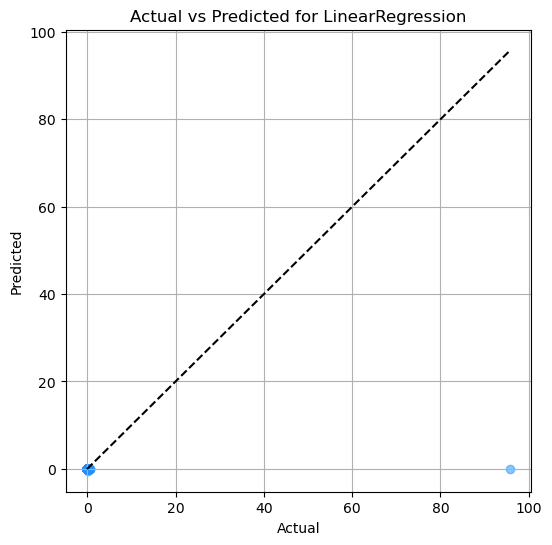


Evaluating Lasso:
Mean Absolute Error (MAE): 0.0752
Mean Squared Error (MSE): 4.9785
Root Mean Squared Error (RMSE): 2.2313
R-squared (R²): -0.0005


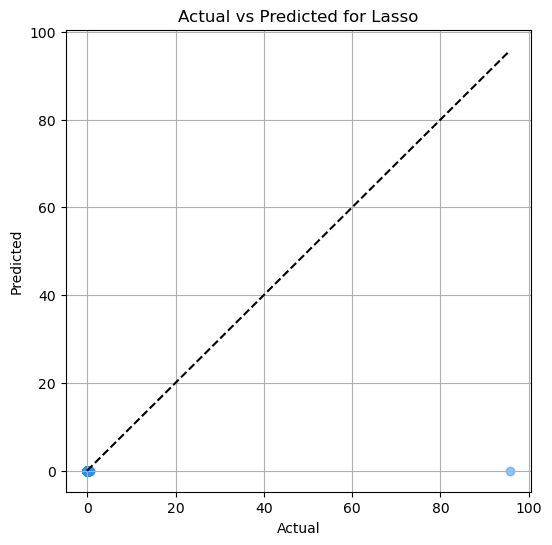


Evaluating XGBRegressor:
Mean Absolute Error (MAE): 0.0617
Mean Squared Error (MSE): 4.9774
Root Mean Squared Error (RMSE): 2.2310
R-squared (R²): -0.0003


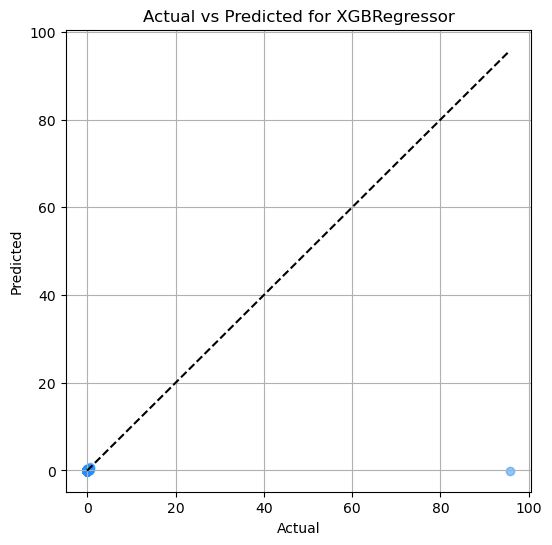


Evaluating RandomForestRegressor:
Mean Absolute Error (MAE): 0.0613
Mean Squared Error (MSE): 4.9746
Root Mean Squared Error (RMSE): 2.2304
R-squared (R²): 0.0003


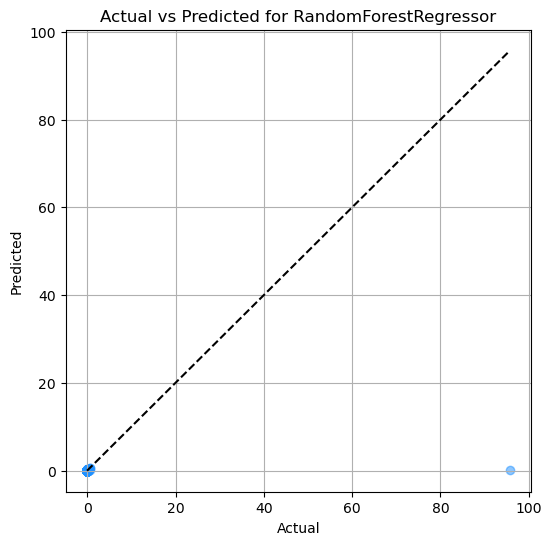


Feature Group: State

Evaluating LinearRegression:
Mean Absolute Error (MAE): 0.0755
Mean Squared Error (MSE): 4.9791
Root Mean Squared Error (RMSE): 2.2314
R-squared (R²): -0.0006


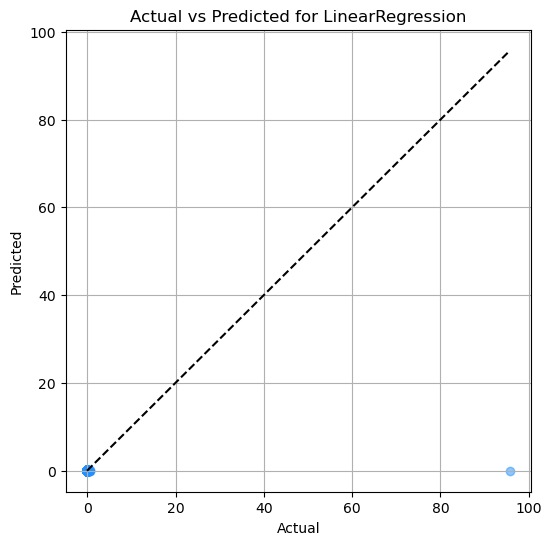


Evaluating Lasso:
Mean Absolute Error (MAE): 0.0752
Mean Squared Error (MSE): 4.9785
Root Mean Squared Error (RMSE): 2.2313
R-squared (R²): -0.0005


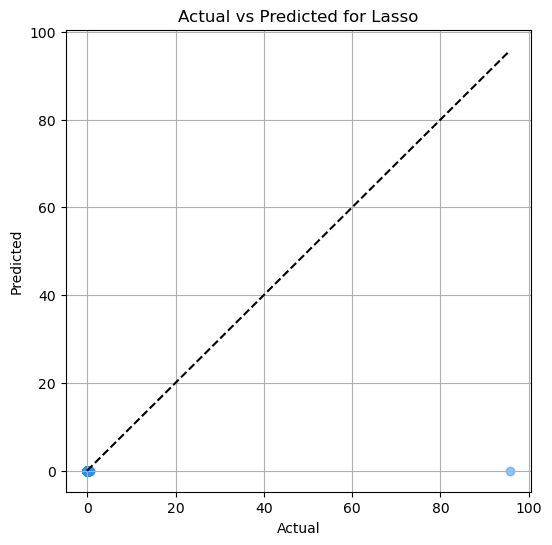


Evaluating XGBRegressor:
Mean Absolute Error (MAE): 0.0755
Mean Squared Error (MSE): 4.9791
Root Mean Squared Error (RMSE): 2.2314
R-squared (R²): -0.0006


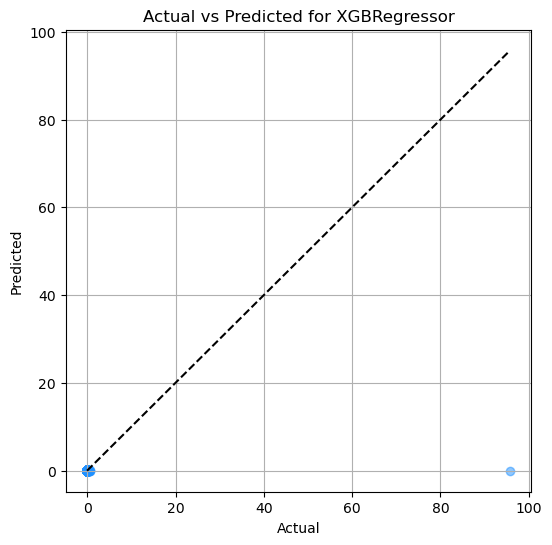


Evaluating RandomForestRegressor:
Mean Absolute Error (MAE): 0.0755
Mean Squared Error (MSE): 4.9791
Root Mean Squared Error (RMSE): 2.2314
R-squared (R²): -0.0006


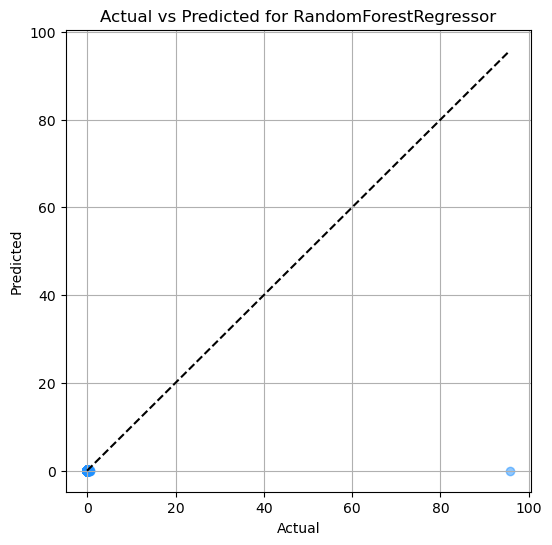


Feature Group: Mechanical

Evaluating LinearRegression:
Mean Absolute Error (MAE): 0.0741
Mean Squared Error (MSE): 4.9770
Root Mean Squared Error (RMSE): 2.2309
R-squared (R²): -0.0002


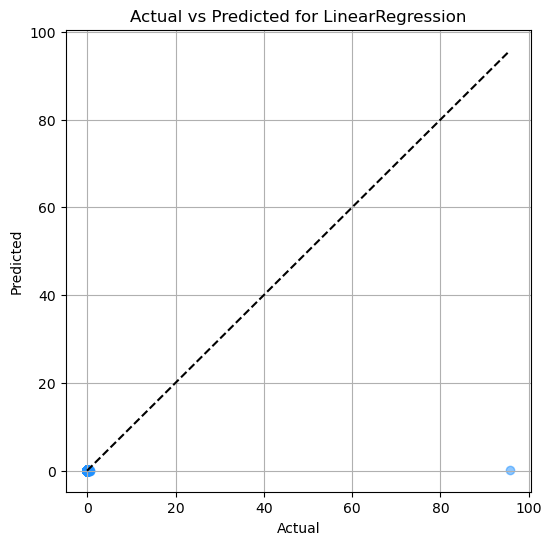


Evaluating Lasso:
Mean Absolute Error (MAE): 0.0752
Mean Squared Error (MSE): 4.9785
Root Mean Squared Error (RMSE): 2.2313
R-squared (R²): -0.0005


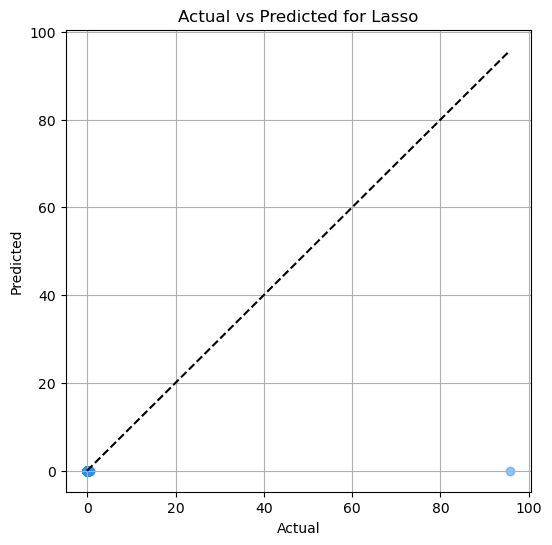


Evaluating XGBRegressor:
Mean Absolute Error (MAE): 0.0734
Mean Squared Error (MSE): 4.9756
Root Mean Squared Error (RMSE): 2.2306
R-squared (R²): 0.0001


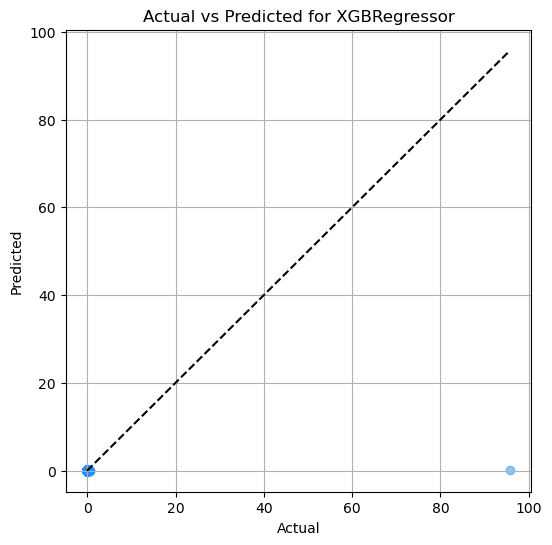


Evaluating RandomForestRegressor:
Mean Absolute Error (MAE): 0.0735
Mean Squared Error (MSE): 4.9756
Root Mean Squared Error (RMSE): 2.2306
R-squared (R²): 0.0001


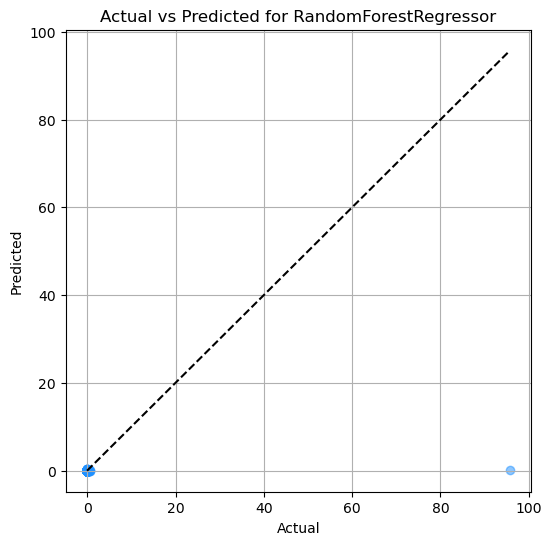


Feature Group: Safety

Evaluating LinearRegression:
Mean Absolute Error (MAE): 0.0734
Mean Squared Error (MSE): 4.9781
Root Mean Squared Error (RMSE): 2.2312
R-squared (R²): -0.0004


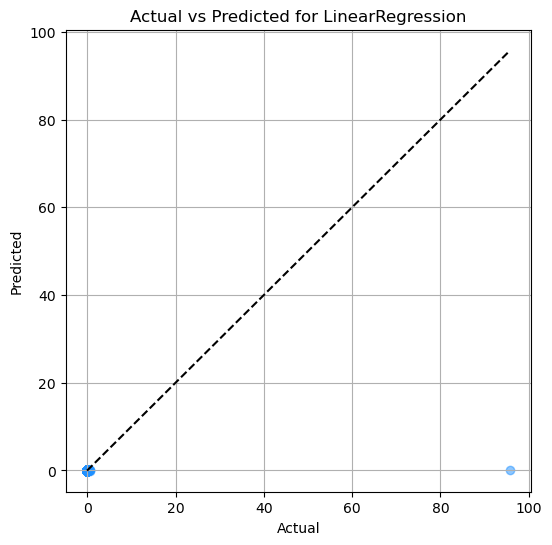


Evaluating Lasso:
Mean Absolute Error (MAE): 0.0752
Mean Squared Error (MSE): 4.9785
Root Mean Squared Error (RMSE): 2.2313
R-squared (R²): -0.0005


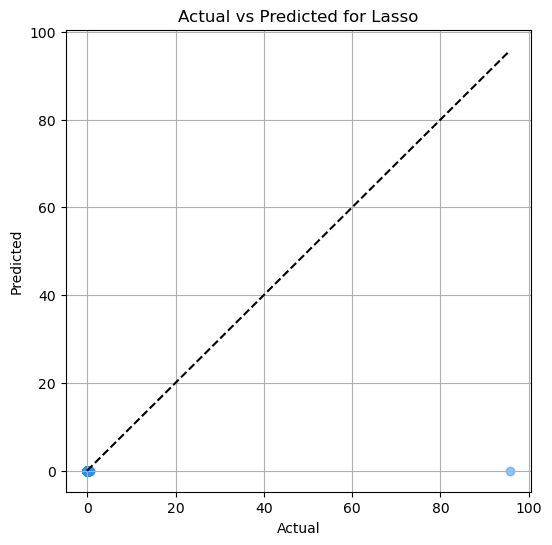


Evaluating XGBRegressor:
Mean Absolute Error (MAE): 0.0724
Mean Squared Error (MSE): 4.9781
Root Mean Squared Error (RMSE): 2.2312
R-squared (R²): -0.0004


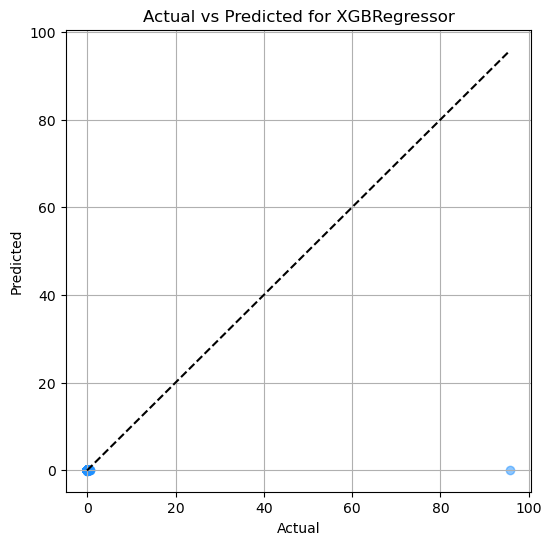


Evaluating RandomForestRegressor:
Mean Absolute Error (MAE): 0.0726
Mean Squared Error (MSE): 4.9780
Root Mean Squared Error (RMSE): 2.2312
R-squared (R²): -0.0004


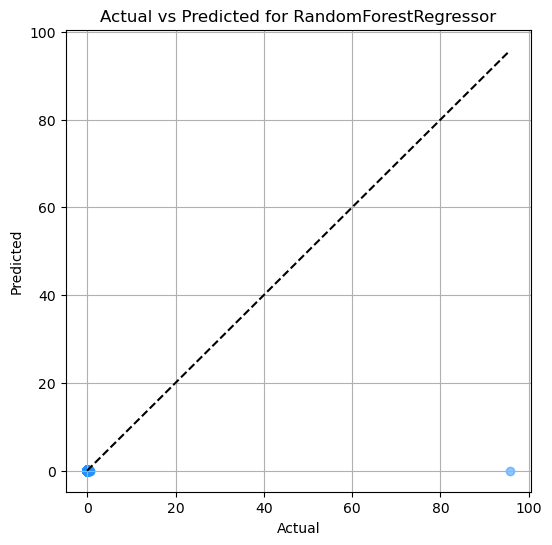


Feature Group: Convenience

Evaluating LinearRegression:
Mean Absolute Error (MAE): 0.0735
Mean Squared Error (MSE): 4.9796
Root Mean Squared Error (RMSE): 2.2315
R-squared (R²): -0.0007


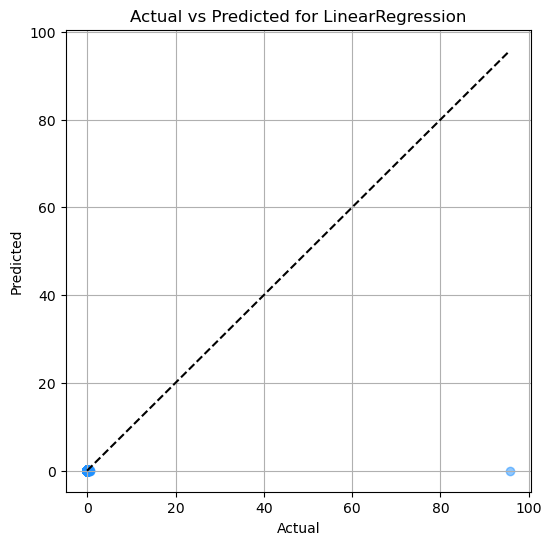


Evaluating Lasso:
Mean Absolute Error (MAE): 0.0752
Mean Squared Error (MSE): 4.9785
Root Mean Squared Error (RMSE): 2.2313
R-squared (R²): -0.0005


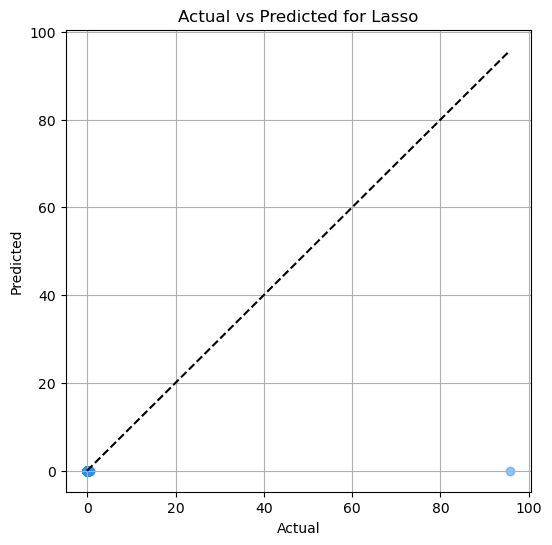


Evaluating XGBRegressor:
Mean Absolute Error (MAE): 0.0723
Mean Squared Error (MSE): 4.9805
Root Mean Squared Error (RMSE): 2.2317
R-squared (R²): -0.0009


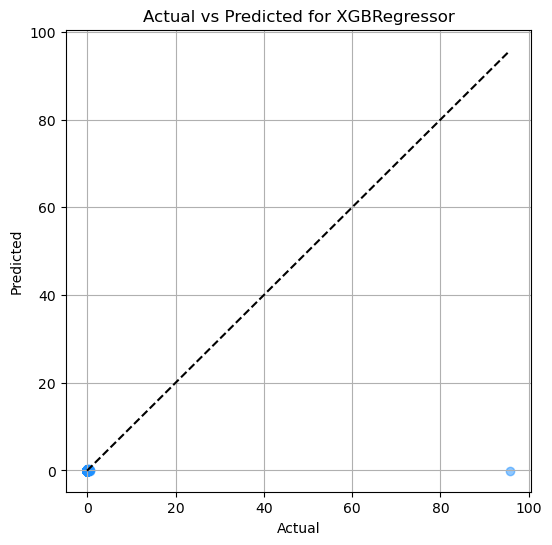


Evaluating RandomForestRegressor:
Mean Absolute Error (MAE): 0.0722
Mean Squared Error (MSE): 4.9805
Root Mean Squared Error (RMSE): 2.2317
R-squared (R²): -0.0009


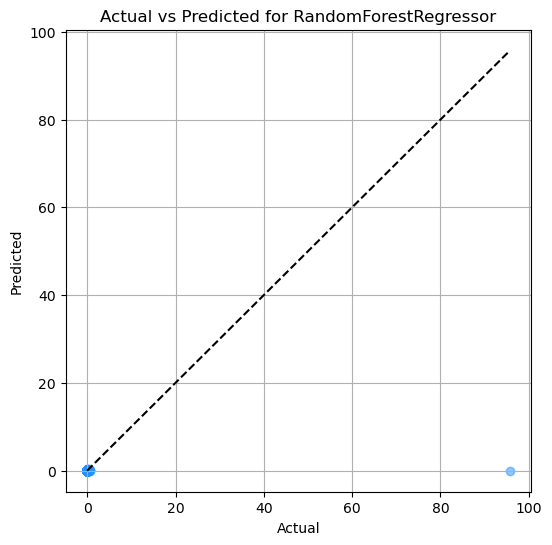


Feature Group: Exterior

Evaluating LinearRegression:
Mean Absolute Error (MAE): 0.0743
Mean Squared Error (MSE): 4.9787
Root Mean Squared Error (RMSE): 2.2313
R-squared (R²): -0.0005


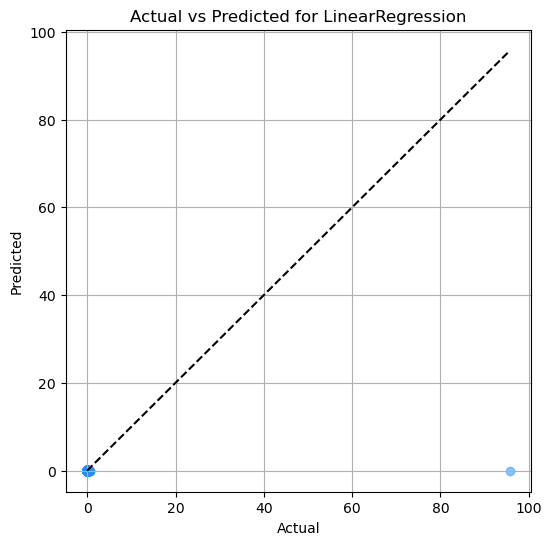


Evaluating Lasso:
Mean Absolute Error (MAE): 0.0752
Mean Squared Error (MSE): 4.9785
Root Mean Squared Error (RMSE): 2.2313
R-squared (R²): -0.0005


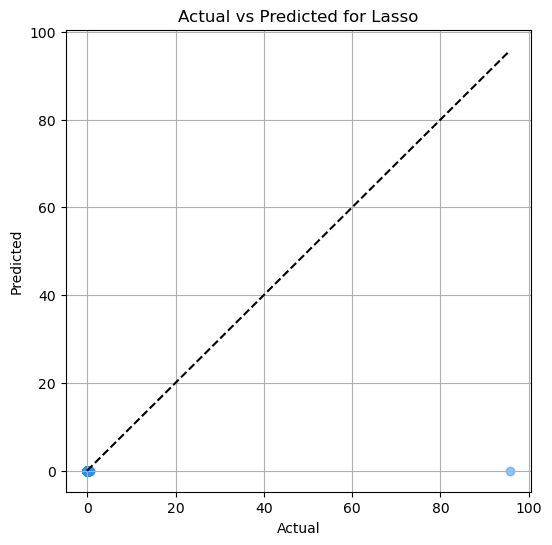


Evaluating XGBRegressor:
Mean Absolute Error (MAE): 0.0741
Mean Squared Error (MSE): 4.9786
Root Mean Squared Error (RMSE): 2.2313
R-squared (R²): -0.0005


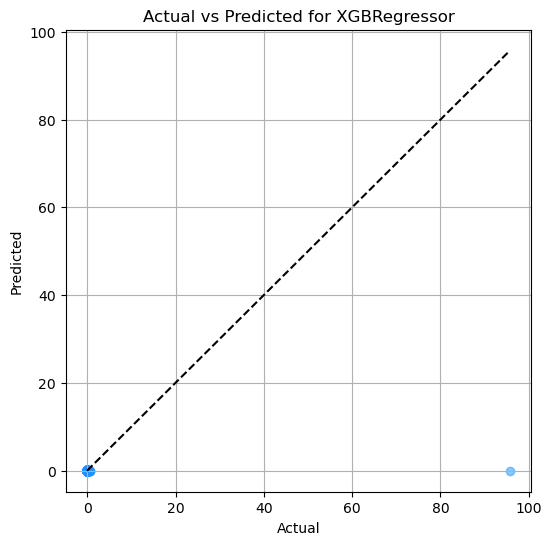


Evaluating RandomForestRegressor:
Mean Absolute Error (MAE): 0.0741
Mean Squared Error (MSE): 4.9786
Root Mean Squared Error (RMSE): 2.2313
R-squared (R²): -0.0005


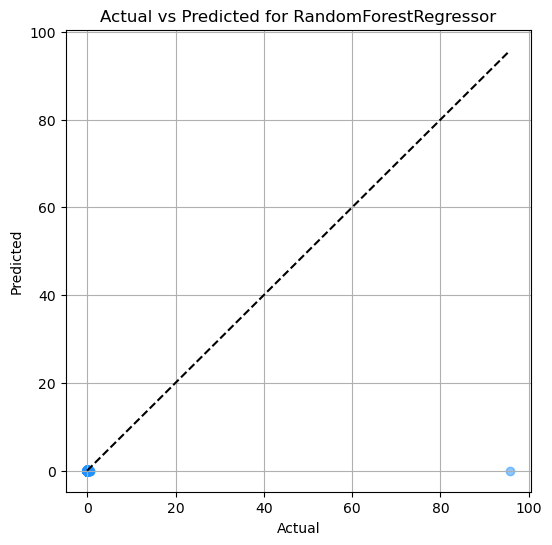

In [111]:
for group_name, features in feature_groups.items():
    print(f"\nFeature Group: {group_name}")
    #Ensure all features are present in both sets
    missing_train = [f for f in features if f not in X_train.columns]
    missing_test = [f for f in features if f not in X_test.columns]

    if missing_train or missing_test:
        print(f"Skipping {group_name} due to missing columns.")
        if missing_train:
            print(f" - Missing from X_train: {missing_train}")
        if missing_test:
            print(f" - Missing from X_test: {missing_test}")
        continue

    X_train_sub = X_train[features]
    X_test_sub = X_test[features]

    for model in regression_models:
        try:
            evaluate_regression_model(model, X_train_sub, y_train, X_test_sub, y_test)
        except Exception as e:
            print(f"Error evaluating {model.__class__.__name__} on {group_name}: {e}")


## Attempt at understanding why the models are performing poorly

In [112]:
X = df.drop('Price', axis=1)
y = df['Price']

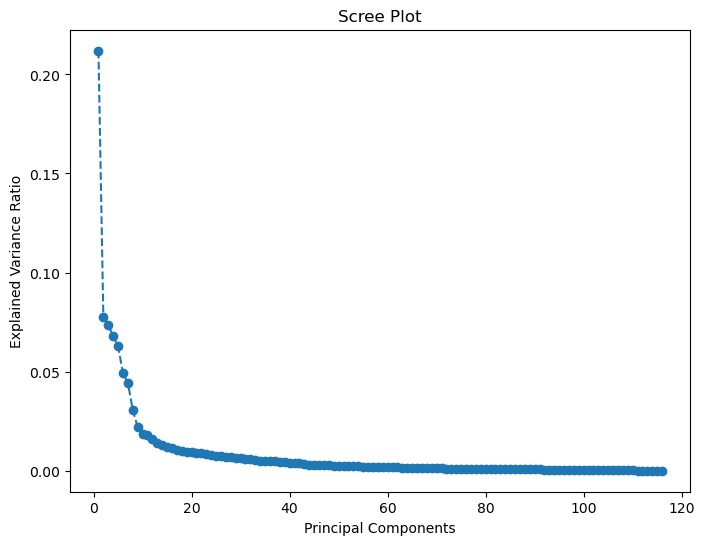

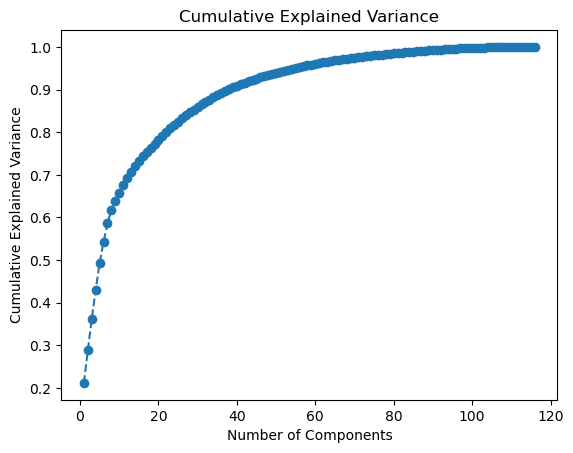

In [113]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X)

#Plot explained variance
explained_variance_ratio = pca.explained_variance_ratio_

#Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

#Cumulative variance plot
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


Evaluating LinearRegression:
Mean Absolute Error (MAE): 0.0719
Mean Squared Error (MSE): 4.9744
Root Mean Squared Error (RMSE): 2.2303
R-squared (R²): 0.0003


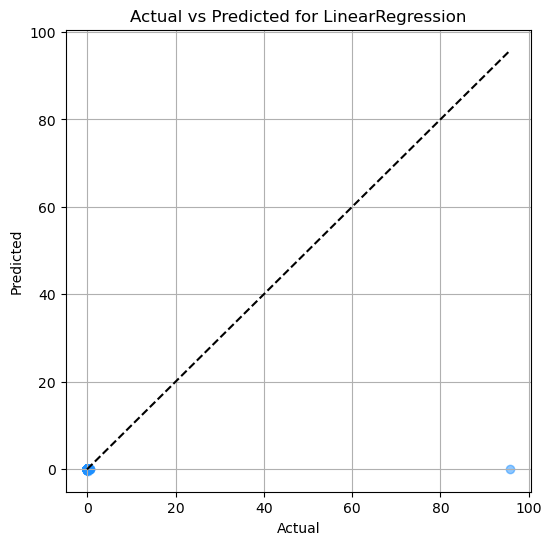


Evaluating RandomForestRegressor:
Mean Absolute Error (MAE): 0.0630
Mean Squared Error (MSE): 4.9785
Root Mean Squared Error (RMSE): 2.2312
R-squared (R²): -0.0005


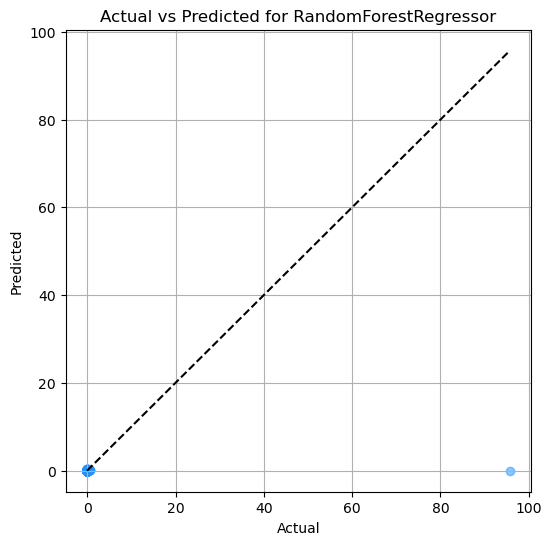

In [115]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42)
]

for model in models:
   evaluate_regression_model(model, X_train_pca, y_train, X_test_pca, y_test)

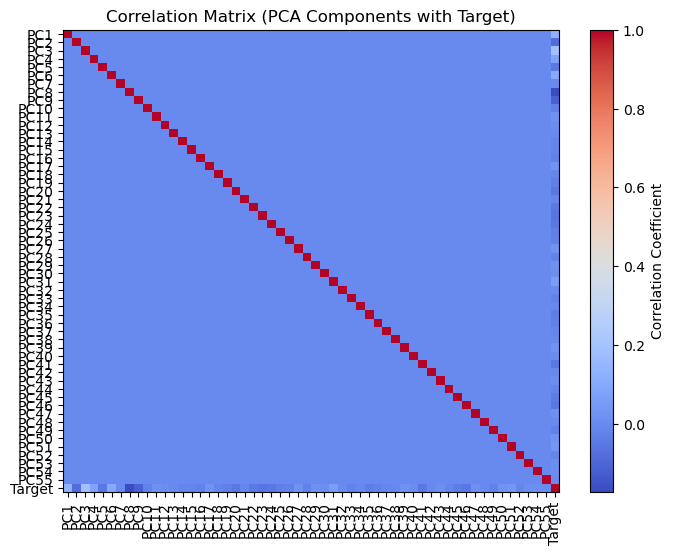

In [116]:
import matplotlib.pyplot as plt
import numpy as np

#Calculate correlation matrix between PCA components and target
corr_matrix = np.corrcoef(X_train_pca.T, y_train)


plt.figure(figsize=(8, 6))  
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(np.arange(corr_matrix.shape[1]), ['PC' + str(i) for i in range(1, X_train_pca.shape[1] + 1)] + ['Target'], rotation=90)
plt.yticks(np.arange(corr_matrix.shape[1]), ['PC' + str(i) for i in range(1, X_train_pca.shape[1] + 1)] + ['Target'])

plt.title('Correlation Matrix (PCA Components with Target)')
plt.show()


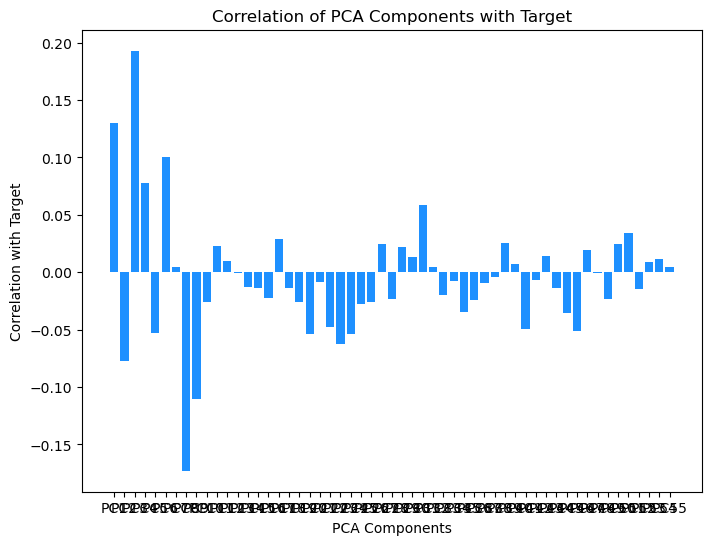

In [117]:

#Calculate the correlation matrix between PCA components and target
corr_matrix = np.corrcoef(X_train_pca.T, y_train)

#Extract just the correlation between PCA components and target
pca_target_corr = corr_matrix[-1, :-1]  

#Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca_target_corr) + 1), pca_target_corr, color='dodgerblue')
plt.xticks(range(1, len(pca_target_corr) + 1), ['PC' + str(i) for i in range(1, len(pca_target_corr) + 1)])
plt.xlabel('PCA Components')
plt.ylabel('Correlation with Target')
plt.title('Correlation of PCA Components with Target')
plt.show()
